In [1]:
#! pip install dataprep

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data4cap = pd.read_csv(r'C:\Users\Vikas\Documents\Computer Learning\Data Science and AI Machine Learning\Hands On ML DL and NLP projects and reading materials\HR Attrition Project\HR_Employee_Attrition_Data.csv')
pd.set_option('display.max_columns', None)
from dataprep.eda import plot, plot_correlation, plot_missing
%autosave 120

NumExpr defaulting to 8 threads.


Autosaving every 120 seconds


## Data Pre-Processing (Part)

In [3]:
data4cap.head(5)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               3   
3                 3          4  Life Sciences              1               4   
4                 2          1        Medical              1               5   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [4]:
data4cap.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
2935   36        No  Travel_Frequently        884  Research & Development   
2936   39        No      Travel_Rarely        613  Research & Development   
2937   27        No      Travel_Rarely        155  Research & Development   
2938   49        No  Travel_Frequently       1023                   Sales   
2939   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
2935                23          2        Medical              1   
2936                 6          1        Medical              1   
2937                 4          3  Life Sciences              1   
2938                 2          3        Medical              1   
2939                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction Gender  HourlyRate  \
2935            2936                        3   Male          41   
2936            2937                        4   Male          42   
2937            2938                        2   Male          87   
2938            2939                        4   Male          63   
2939            2940                        2   Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
2935               4         2      Laboratory Technician                4   
2936               2         3  Healthcare Representative                1   
2937               4         2     Manufacturing Director                2   
2938               2         2            Sales Executive                2   
2939               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
2935       Married           2571        12290                   4      Y   
2936       Married           9991        21457                   4      Y   
2937       Married           6142         5174                   1      Y   
2938       Married           5390        13243                   2      Y   
2939       Married           4404        10228                   2      Y   

     OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
2935       No                 17                  3                         3   
2936       No                 15                  3                         1   
2937      Yes                 20                  4                         2   
2938       No                 14                  3                         4   
2939       No                 12                  3                         1   

      StandardHours  StockOptionLevel  TotalWorkingYears  \
2935             80                 1                 17   
2936             80                 1                  9   
2937             80                 1                  6   
2938             80                 0                 17   
2939             80                 0                  6   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
2935                      3                3               5   
2936                      5                3               7   
2937                      0                3               6   
2938                      3                2               9   
2939                      3                4               4   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
2935                   2                        0                     3  
2936                   7                        1                     7  
2937                   2                        0                     3  
2938                   6                        0                     8  
2939                   3                        1                     2

In [5]:
data4cap.shape

(2940, 35)

In [6]:
data4cap.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
# Drop duplicate rows if any.

data4cap.drop_duplicates(inplace=True)
print(data4cap.shape)

(2940, 35)


In [8]:
# No duplicate rows found

data4cap_dup = data4cap[data4cap.duplicated()]
print(data4cap_dup.shape)

(0, 35)


In [9]:
# Check for single value data, irrelevant data

print(data4cap.EmployeeCount.unique())
print(data4cap.EmployeeCount.nunique())
print(data4cap.Over18.unique())
print(data4cap.Over18.nunique())
print(data4cap.StandardHours.unique())
print(data4cap.StandardHours.nunique())
print(data4cap.JobLevel.unique())
print(data4cap.JobLevel.nunique())

[1]
1
['Y']
1
[80]
1
[2 1 3 4 5]
5


In [10]:
data4cap = data4cap.drop(['EmployeeCount', 'EmployeeNumber','Over18','StandardHours'], axis=1)
data4cap.head(10)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   
7   30        No      Travel_Rarely       1358  Research & Development   
8   38        No  Travel_Frequently        216  Research & Development   
9   36        No      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   
5                 2          2  Life Sciences                        4   
6                 3          3        Medical                        3   
7                24          1  Life Sciences                        4   
8                23          3  Life Sciences                        4   
9                27          3        Medical                        3   

   Gender  HourlyRate  JobInvolvement  JobLevel                    JobRole  \
0  Female          94               3         2            Sales Executive   
1    Male          61               2         2         Research Scientist   
2    Male          92               2         1      Laboratory Technician   
3  Female          56               3         1         Research Scientist   
4    Male          40               3         1      Laboratory Technician   
5    Male          79               3         1      Laboratory Technician   
6  Female          81               4         1      Laboratory Technician   
7    Male          67               3         1      Laboratory Technician   
8    Male          44               2         3     Manufacturing Director   
9    Male          94               3         2  Healthcare Representative   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single           5993        19479   
1                2       Married           5130        24907   
2                3        Single           2090         2396   
3                3       Married           2909        23159   
4                2       Married           3468        16632   
5                4        Single           3068        11864   
6                1       Married           2670         9964   
7                3      Divorced           2693        13335   
8                3        Single           9526         8787   
9                3       Married           5237        16577   

   NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                   8      Yes                 11                  3   
1                   1       No                 23                  4   
2                   6      Yes                 15                  3   
3                   1      Yes                 11                  3   
4                   9       No                 12                  3   
5                   0       No                 13                  3   
6                   4      Yes                 20                  4   
7                   1       No                 22                  4   
8                   0       No                 21                  4   
9                   6       No                 13                  3   

   RelationshipS

In [11]:
data4cap.shape

(2940, 31)

In [12]:
data4cap.describe()

Age    DailyRate  DistanceFromHome    Education  \
count  2940.000000  2940.000000       2940.000000  2940.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.133819   403.440447          8.105485     1.023991   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              2940.000000  2940.000000     2940.000000  2940.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.092896    20.325969        0.711440     1.106752   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    84.000000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  \
count      2940.000000    2940.000000   2940.000000         2940.000000   
mean          2.728571    6502.931293  14313.103401            2.693197   
std           1.102658    4707.155770   7116.575021            2.497584   
min           1.000000    1009.000000   2094.000000            0.000000   
25%           2.000000    2911.000000   8045.000000            1.000000   
50%           3.000000    4919.000000  14235.500000            2.000000   
75%           4.000000    8380.000000  20462.000000            4.000000   
max           4.000000   19999.000000  26999.000000            9.000000   

       PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
count        2940.000000        2940.000000               2940.000000   
mean           15.209524           3.153741                  2.712245   
std             3.659315           0.360762                  1.081025   
min            11.000000           3.000000                  1.000000   
25%            12.000000           3.000000                  2.000000   
50%            14.000000           3.000000                  3.000000   
75%            18.000000           3.000000                  4.000000   
max            25.000000           4.000000                  4.000000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       2940.000000        2940.000000            2940.000000   
mean           0.793878          11.279592               2.799320   
std            0.851932           7.779458               1.289051   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      2940.000000     2940.000000         2940.000000   
mean          2.761224        7.008163            4.229252   
std           0.706356        6.125483            3.622521   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              2940.000000           2940.000000  
mean                  2.187755              4.123129  
std                   3.221882              3.567529  


In [13]:
# Check min and max values in each variable to see if any data doesnt correspond and needs to be altered.
data4cap.describe().loc[['min','max']]

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
min  18.0      102.0               1.0        1.0                      1.0   
max  60.0     1499.0              29.0        5.0                      4.0   

     HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
min        30.0             1.0       1.0              1.0         1009.0   
max       100.0             4.0       5.0              4.0        19999.0   

     MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
min       2094.0                 0.0               11.0                3.0   
max      26999.0                 9.0               25.0                4.0   

     RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
min                       1.0               0.0                0.0   
max                       4.0               3.0               40.0   

     TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
min                    0.0              1.0             0.0   
max                    6.0              4.0            40.0   

     YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
min                 0.0                      0.0                   0.0  
max                18.0                     15.0                  17.0

In [14]:
data4cap['PerformanceRating'].unique()

array([3, 4], dtype=int64)

#### All below observations should be clarified with Business or Data Gathering Team. For purposes of this project, since no access to the Business or Data Gathering Team - the observations are ignored and project proceeded.

(1) Daily Rate, Hourly rate (and subsequently Monthly Income and Monthly Rate) have no correlation - which is strange.

(2) Daily Rate, Monthly Income and Monthly Rate have very high difference between min and max. It is possible, but should be clarified. Hourly Rate does not seem to show that big of a difference.

(3) Monthly Income is lower than Monthly Rate - which is also strange.

(4) NumCompaniesWorked starts with a value of 0 - Intuitively, if the employee is employed with the business, default NumCompaniesWorked is already 1. Should be clarified.

(5) Performance rating has only two values which is strange - since the scale should probably start from 0 (or 1) till 4 or 5. Should be clarified.

##### No units standardization required.

In [15]:
# Check for null values

data4cap.isnull().sum()

# No null values found

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

## Exploratory Data Analysis

In [16]:
# Correlation between variables
corrMat = round(data4cap.corr(),2)
print(corrMat)
print(corrMat.shape)

                           Age  DailyRate  DistanceFromHome  Education  \
Age                       1.00       0.01             -0.00       0.21   
DailyRate                 0.01       1.00             -0.00      -0.02   
DistanceFromHome         -0.00      -0.00              1.00       0.02   
Education                 0.21      -0.02              0.02       1.00   
EnvironmentSatisfaction   0.01       0.02             -0.02      -0.03   
HourlyRate                0.02       0.02              0.03       0.02   
JobInvolvement            0.03       0.05              0.01       0.04   
JobLevel                  0.51       0.00              0.01       0.10   
JobSatisfaction          -0.00       0.03             -0.00      -0.01   
MonthlyIncome             0.50       0.01             -0.02       0.09   
MonthlyRate               0.03      -0.03              0.03      -0.03   
NumCompaniesWorked        0.30       0.04             -0.03       0.13   
PercentSalaryHike         0.00       0

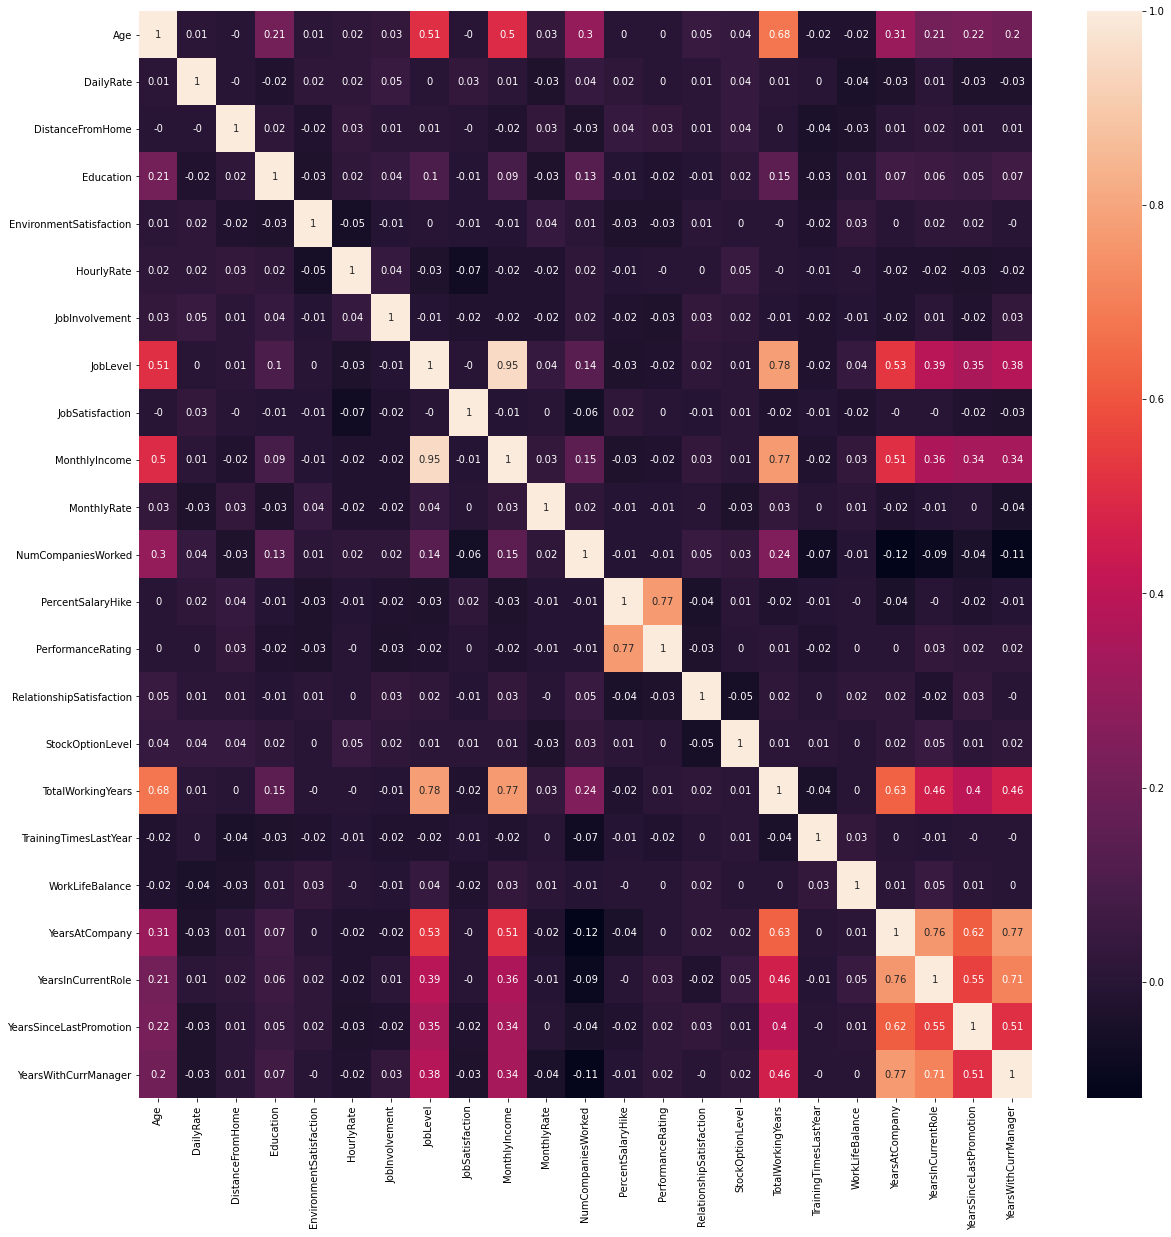

In [17]:
# Visualise correlation between variables.
plt.figure(figsize=(20,20))
sns.heatmap(corrMat, annot=True)
plt.show()

#### Observations

1. Job Level, Monthly Income, Years at Company, Years in Current Role, Years Since last promotion and Years with Current Manager are all highly co-related to each other. 
2. The rest of the parameters dont show much of a corelation.

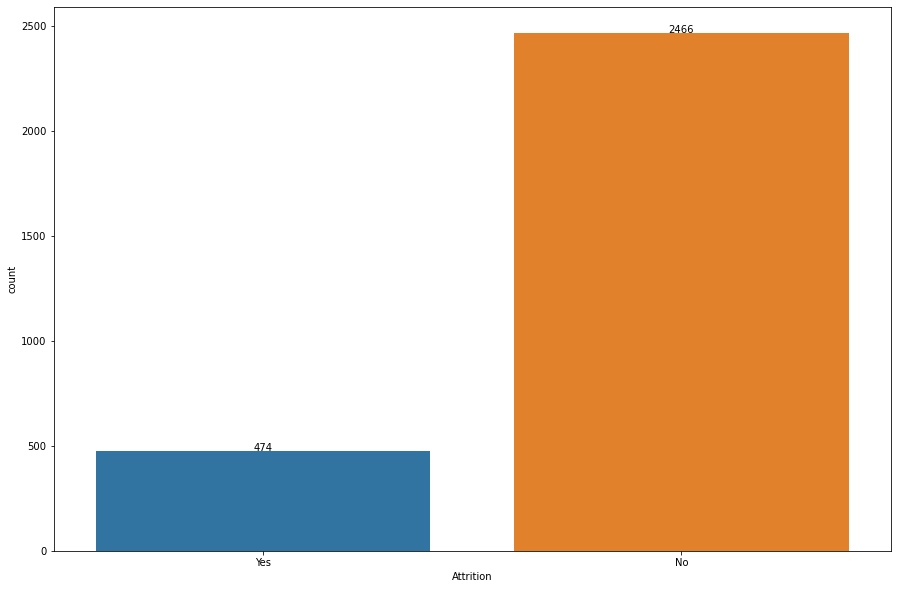

In [18]:
# Plot the attrition in the company

plt.figure(figsize = (15,10))
countplot_attrition = sns.countplot(data = data4cap, x = 'Attrition')

i=0
for p in countplot_attrition.patches:
    height = p.get_height()
    countplot_attrition.text(p.get_x()+p.get_width()/2, height + 0.1,
                             data4cap.Attrition.value_counts(ascending=True)[i], ha="center")
    i += 1
    
plt.show()

In [19]:
# Calculate attrition rate in the company

attrition_rate = data4cap.Attrition.value_counts()['Yes']/data4cap.Attrition.value_counts().sum()
print(f'Attrition Rate at the company is {(attrition_rate)*100:.2f}%.')



Attrition Rate at the company is 16.12%.


### Attrition comparison by counts and percentage (Total and by different fields/variables).

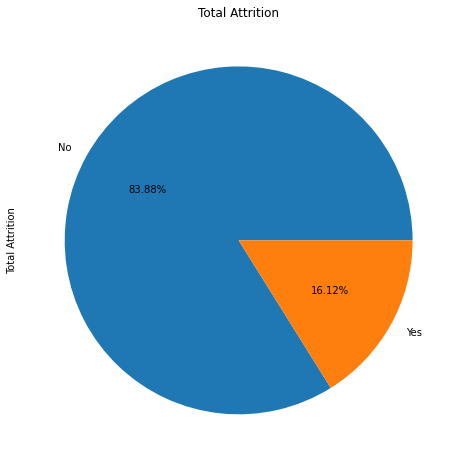

In [20]:
attr = data4cap.groupby(['Attrition']).Age.count().reset_index()

attr_total = attr.groupby(['Attrition']).sum().reset_index()

plt.figure(figsize = (12,8))
attr_total.Age.plot.pie(labels = attr.Attrition, autopct = '%.2f%%')
plt.ylabel('Total Attrition')
plt.title('Total Attrition')
plt.show()


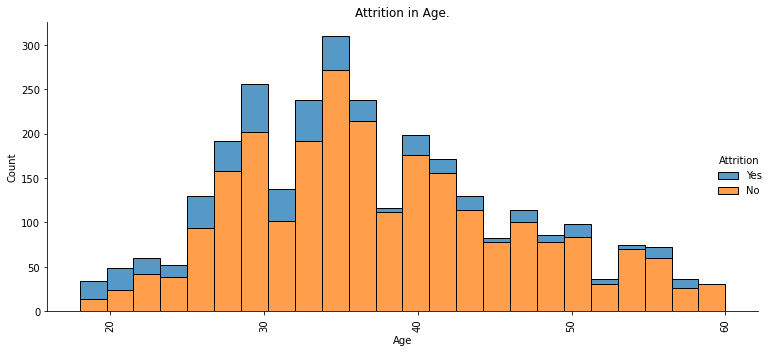

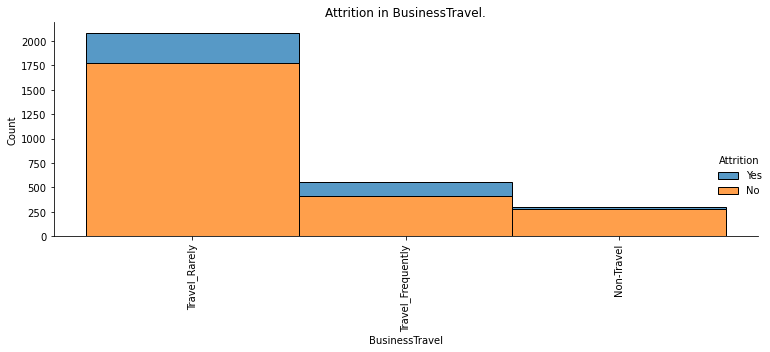

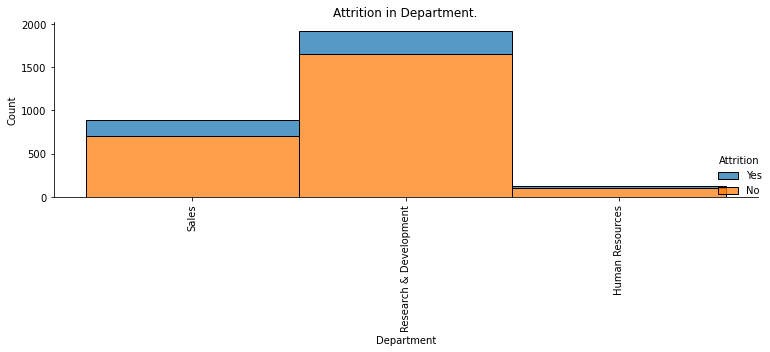

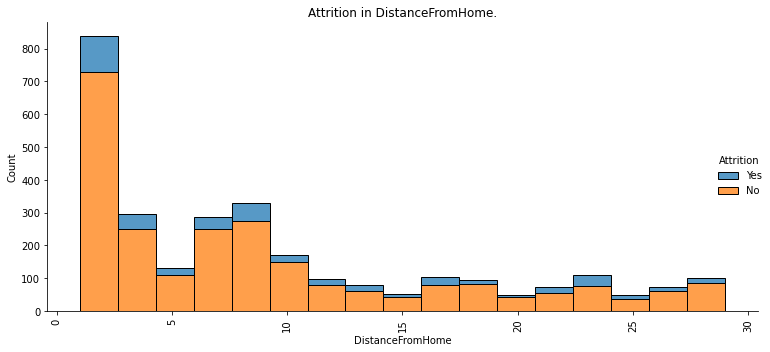

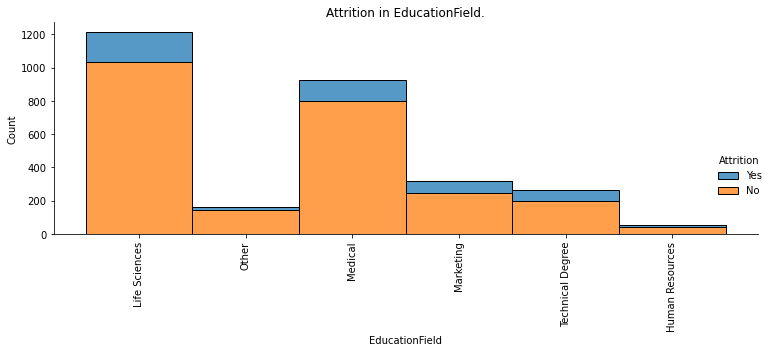

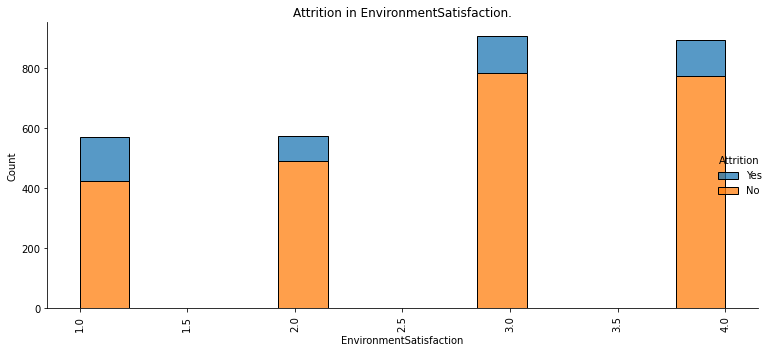

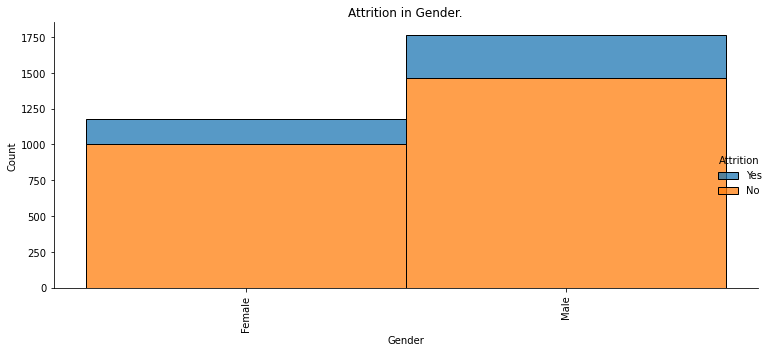

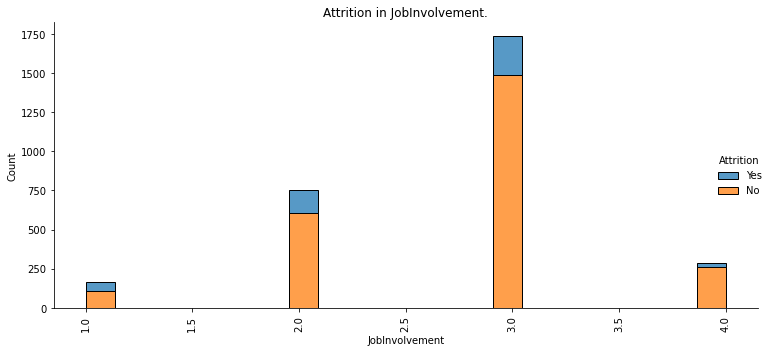

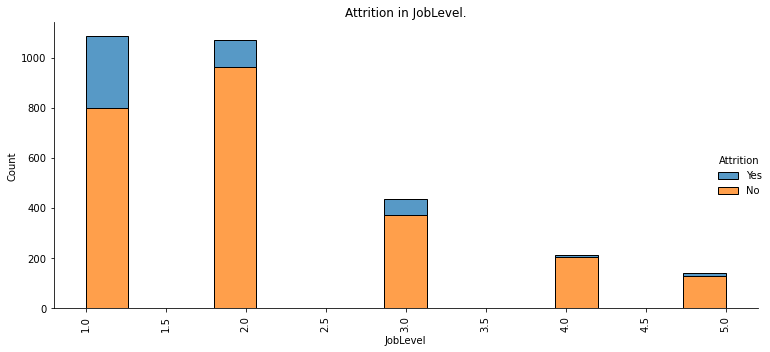

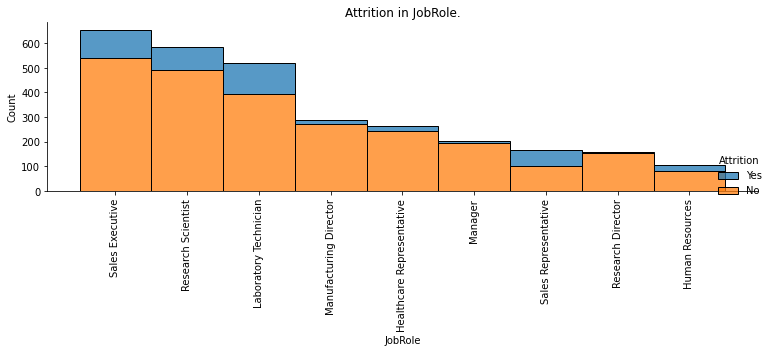

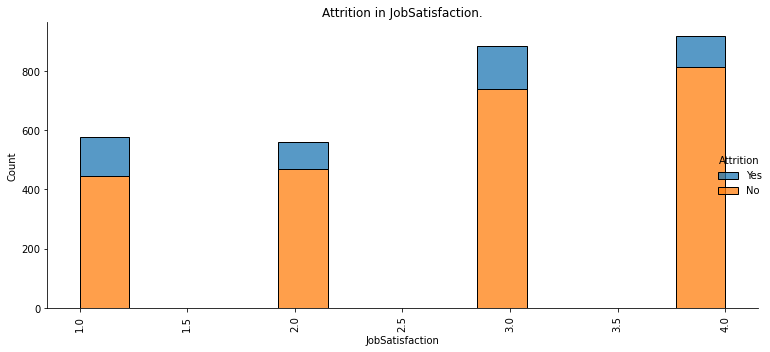

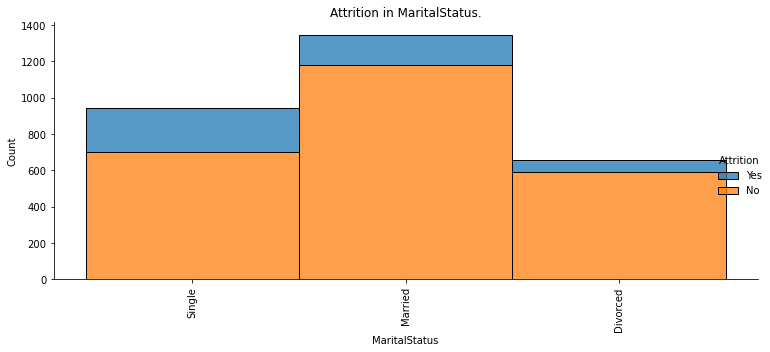

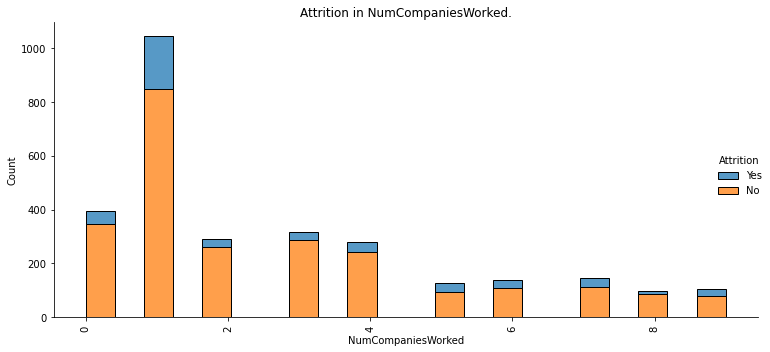

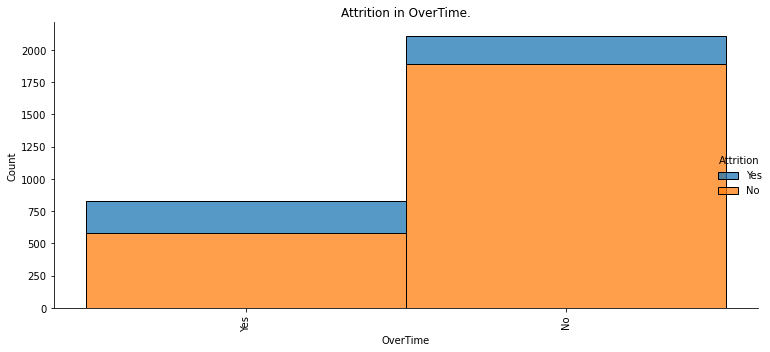

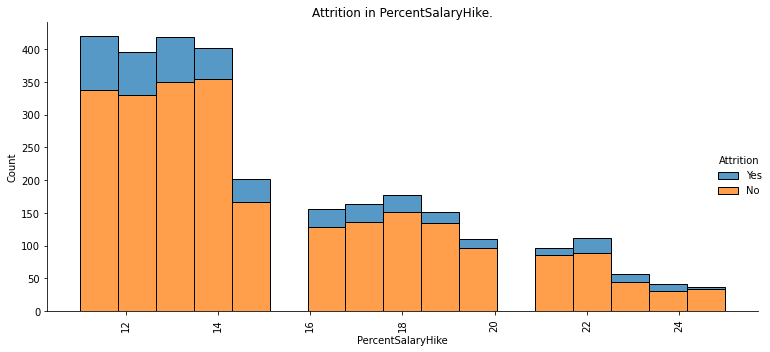

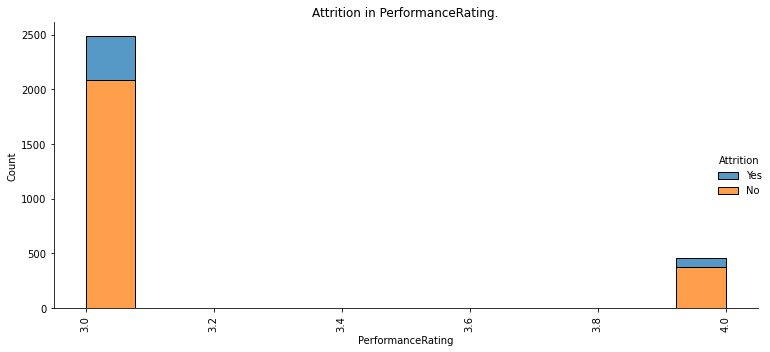

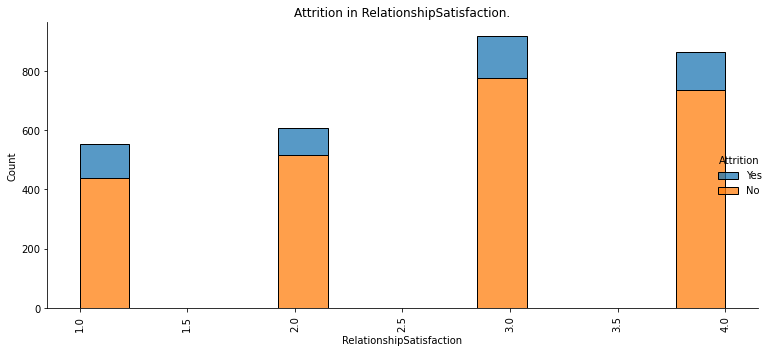

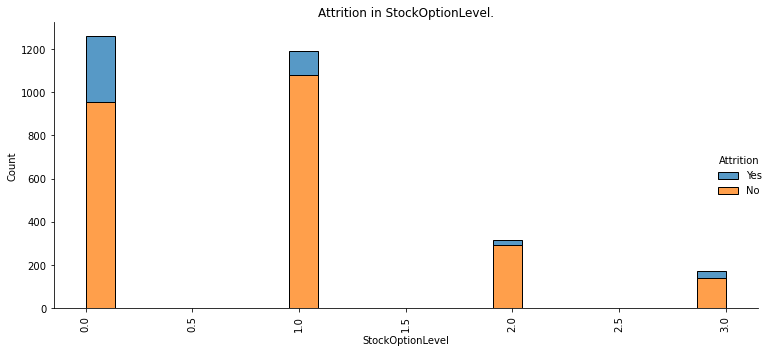

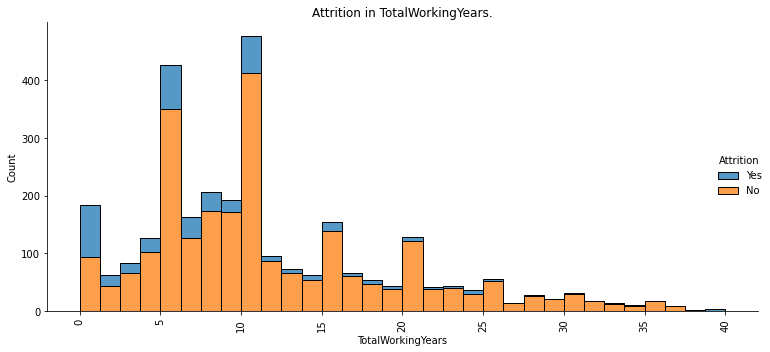

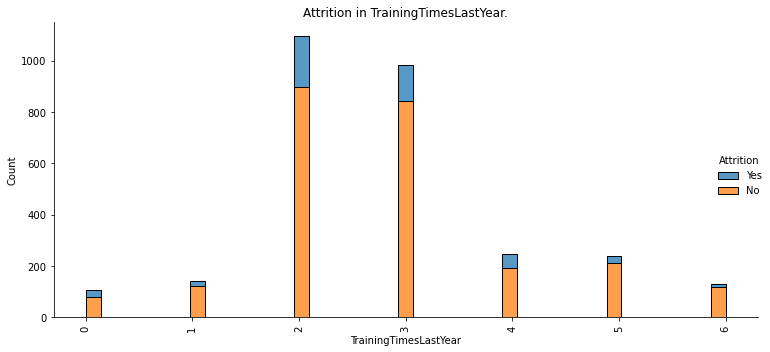

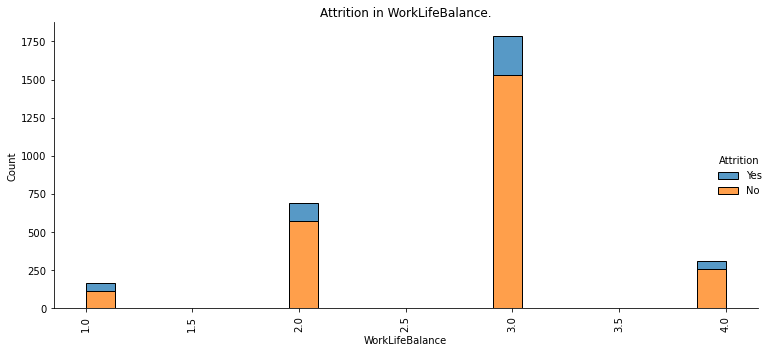

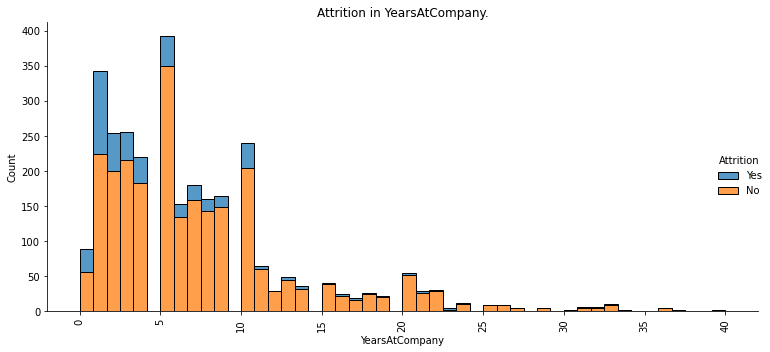

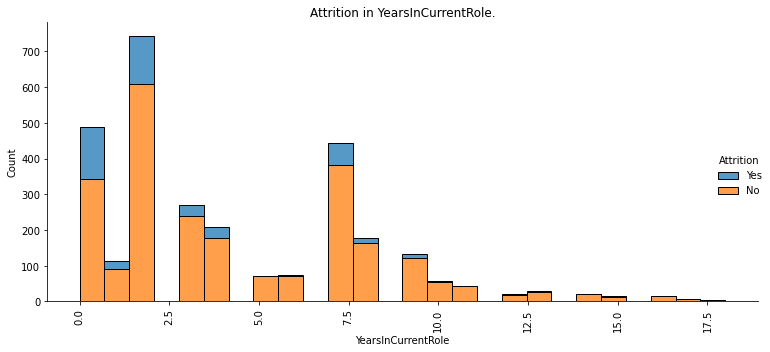

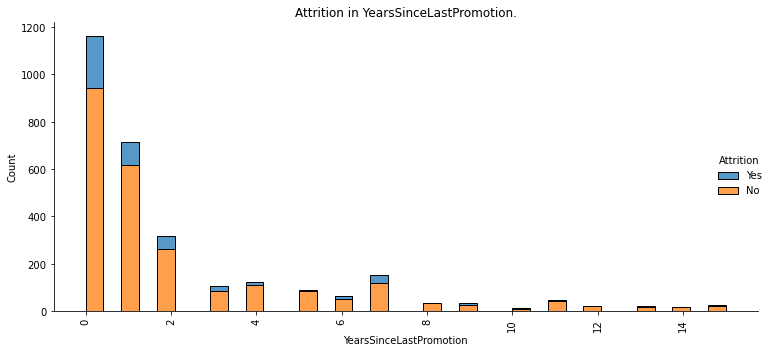

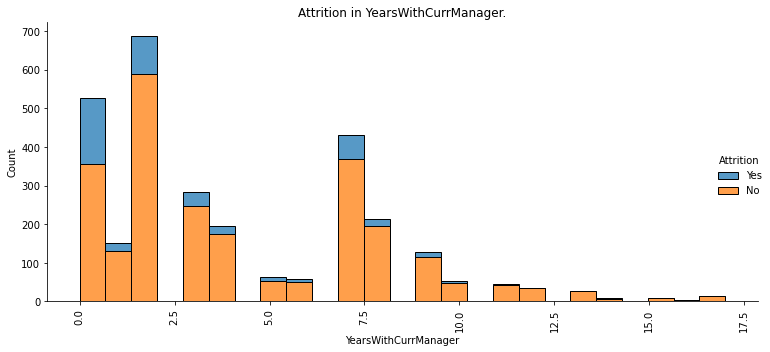

In [21]:
attrition_by_features = ['Age', 'BusinessTravel', 'Department', 'DistanceFromHome','EducationField',
                         'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole','JobSatisfaction',
                        'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
                        'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
                         'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                         'YearsWithCurrManager']

for a in range(len(attrition_by_features)):
    sns.displot(x = attrition_by_features[a], hue = 'Attrition', data=data4cap, multiple='stack', height = 5, aspect = 2)
    plt.xticks(rotation=90)
    plt.title(f'Attrition in {attrition_by_features[a]}.')
    plt.tight_layout()
    plt.show()



##### Observations

1. Attribution decreases as age increases.
2. High Travel Frequency seems to equate to a higher proportion of Attrition
3. Department-wise attrition seems to be similar. 
4. Distance from home, Educational Field, Gender, Job Involvemnet, Percent Salary Hike, Performance Rating, Relationship Satisfaction, Training Times Last Year, Work Life Balance, Years since Last promotion do not seem to have a significant impact on Attrition.
5. Attrition is highest amongst employees with low Environment  Satisfaction.
6. Attrition is highest in low job levels. 
7. Attrition is high in employees with Low job satisfaction. Strangely, it is also high in employees with high-medium Job Satisfaction.
8. Attrition is highest in Single employees.
9. Attrition is highest in persons who have worked in 1 company. 
10. Attrition is higher in employees who have workd overtime. 
11. Lower stock option level to employees shows higher atttirtion. 
12. Employees who have worked 1-2 years or less, have high Attrition
13. Attrition keeps reducing (significantly between years 5 to 6) as the number of Years at company for the employee keeps increasing. 
14. As Years in Current Role increases, Attrition decreases. 
15. First year with current manager seems to be a make or break time. Attrition is high during this period. 

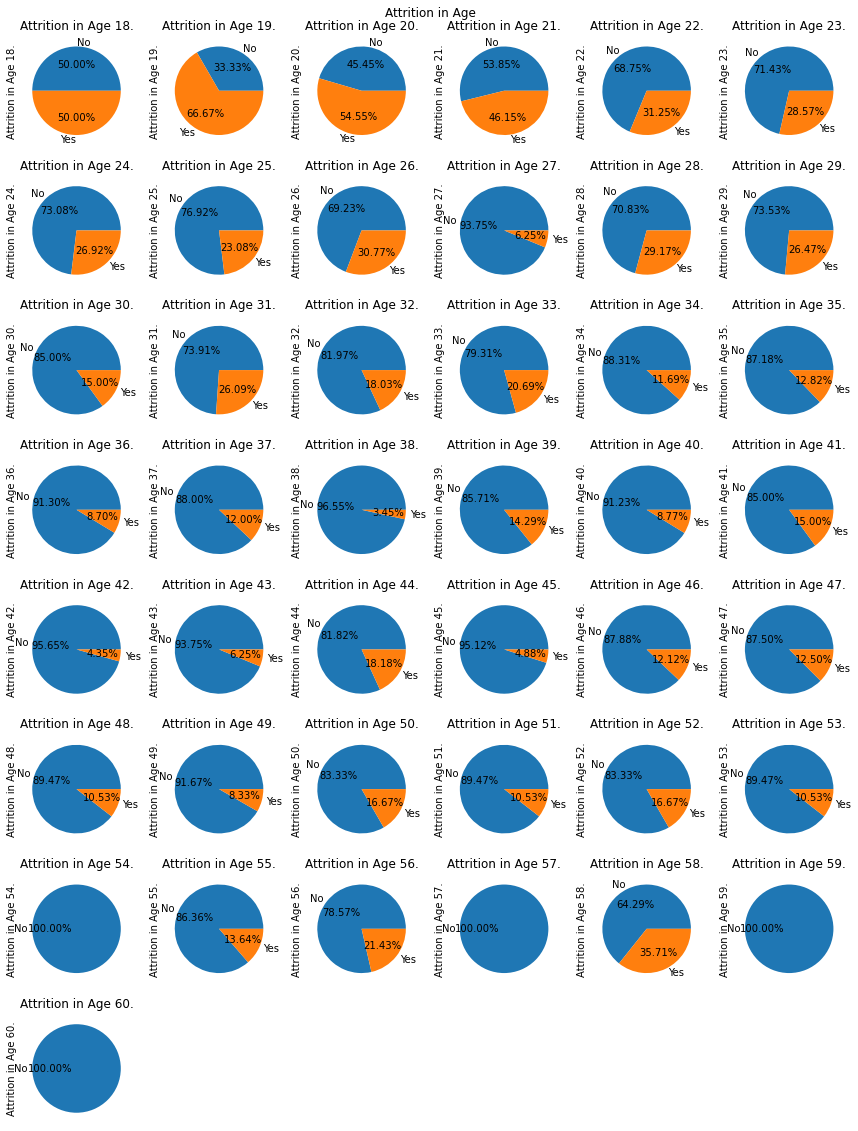

In [22]:
from math import floor, ceil

temp_age_unique = sorted(data4cap['Age'].unique())
column_age = 6
row_age = ceil(len(temp_age_unique)/column_age)
#print(row_age, column_age)
temp_age_data = data4cap.groupby(['Age', 'Attrition']).BusinessTravel.count().reset_index()
#print(temp_age_data)
plt.figure(figsize = (12, row_age*2))
index_age = 1
for val_age in temp_age_unique:
    temp_age_df = temp_age_data[temp_age_data['Age'] == val_age]
    #print(temp_age_df)
    plt.suptitle(f'Attrition in Age')
    plt.subplot(row_age, column_age, index_age)
    index_age += 1 
    temp_age_df.BusinessTravel.plot.pie(labels = temp_age_df.Attrition, autopct = '%.2f%%')
    plt.ylabel(f'Attrition in Age {val_age}.')
    plt.title(f'Attrition in Age {val_age}.')
plt.tight_layout()
plt.show()

# temp_age_fiftyeight = temp_age_data[temp_age_data['Age'] == 58]
# print(temp_age_fiftyeight)

#### Observations

1. Attrition is high from ages 18 till 26 - between 66.67% (Age 19) to 23.08% (Age 25). 
2. From Ages 27 to 33 it gradually(but in a non-linear fashion) decreases and is between the ranges - 6.25% to 29.17%
3. From ages 34 onwards there is a a sudden drop and stabilisation to between 0 to 21.43%
4. In this 34 to 60 age - Age 58 is an outlier with 35.71% Attrition (10 out of 28) people. HR can look into whether these
were people who opted for early retirement or any other reasons. 

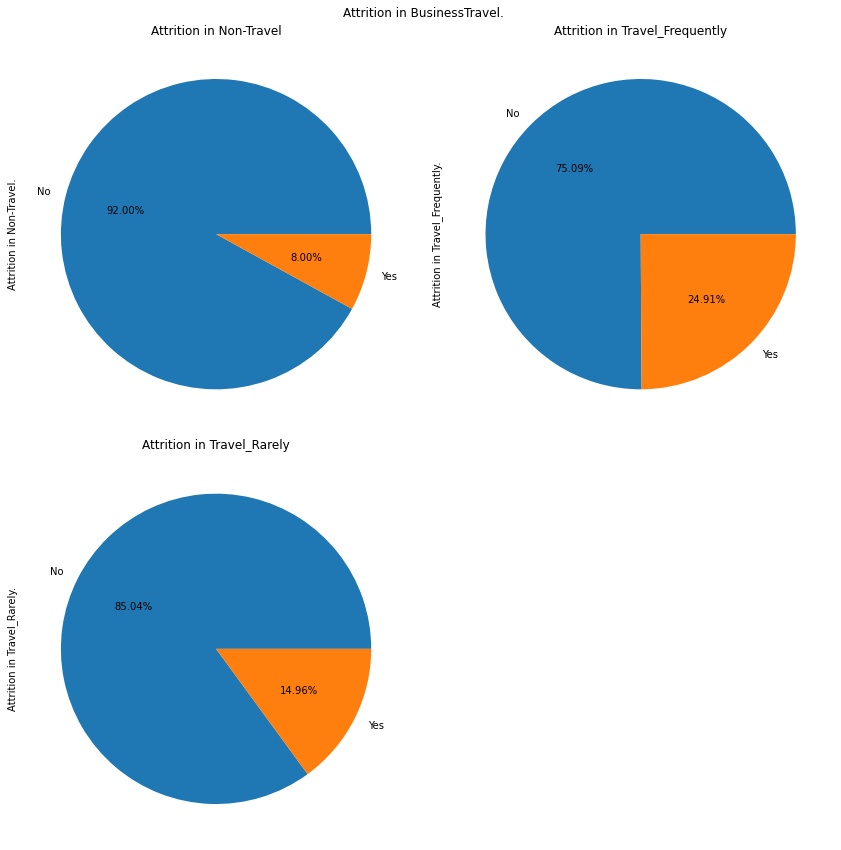

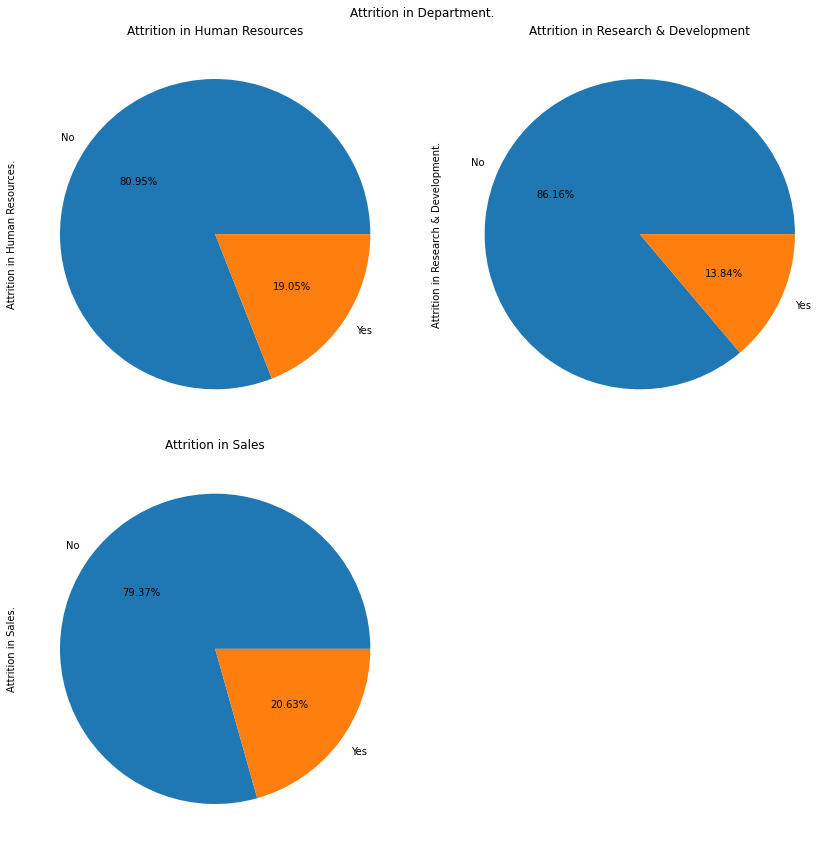

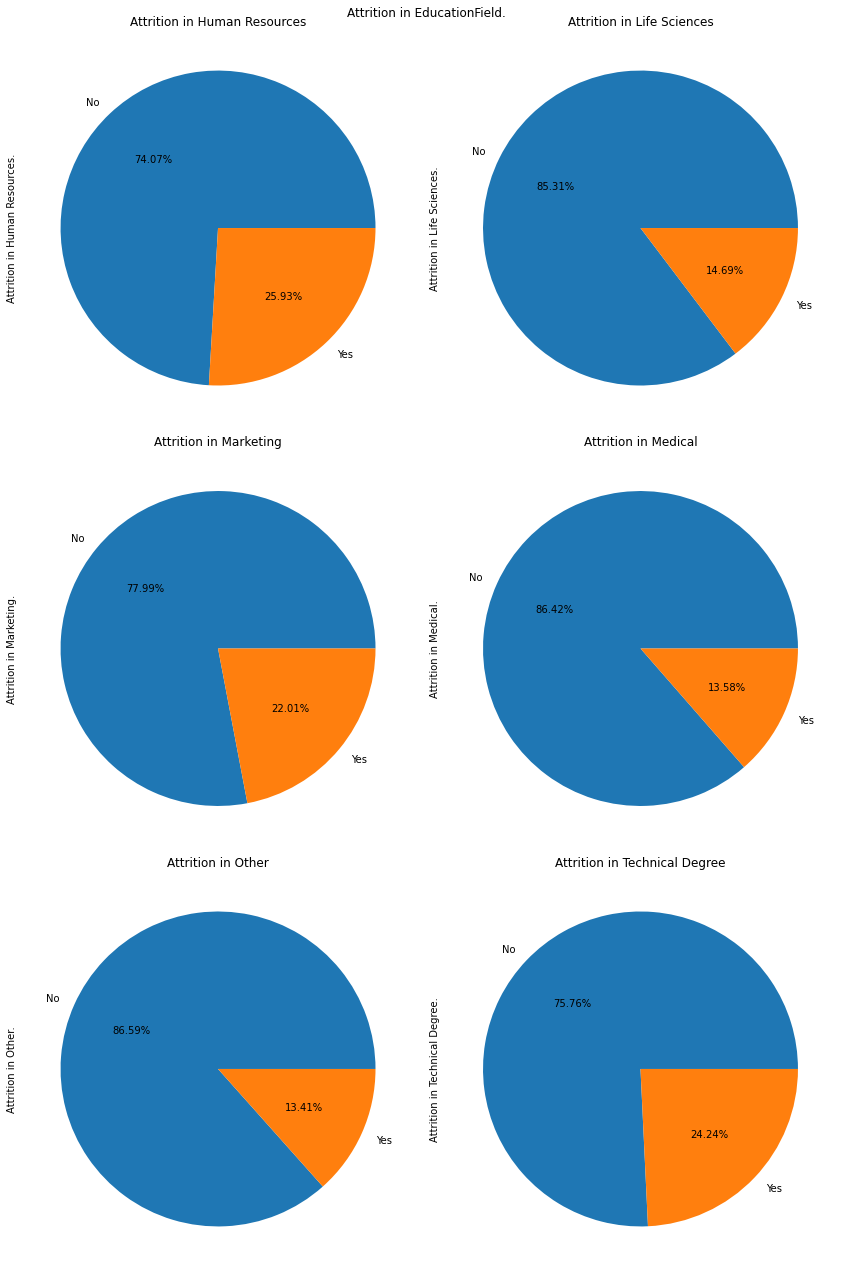

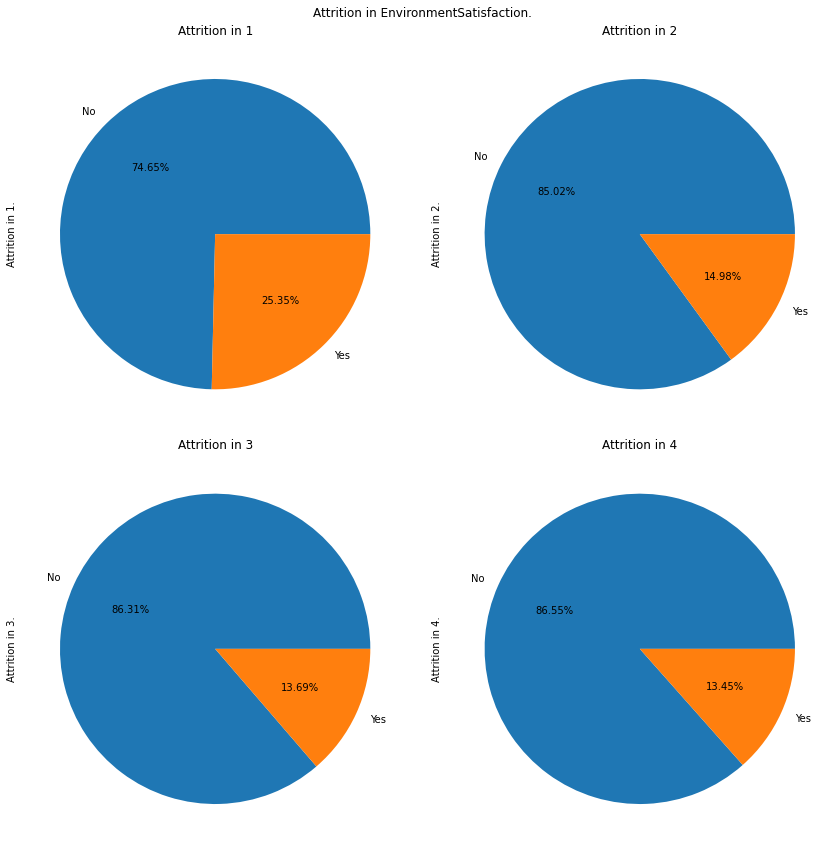

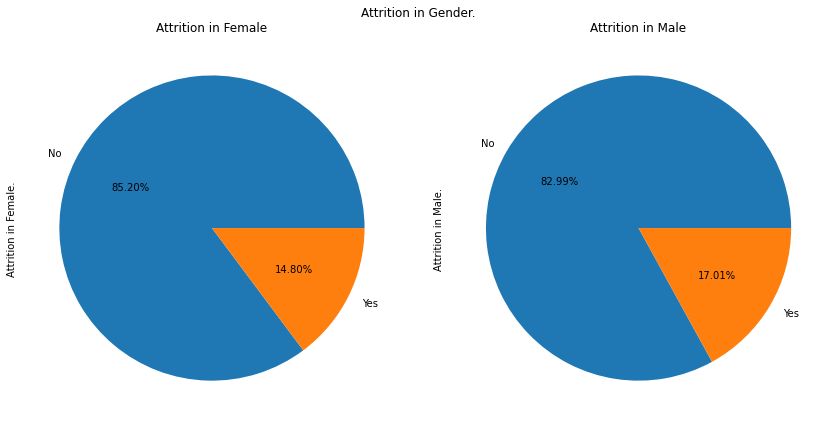

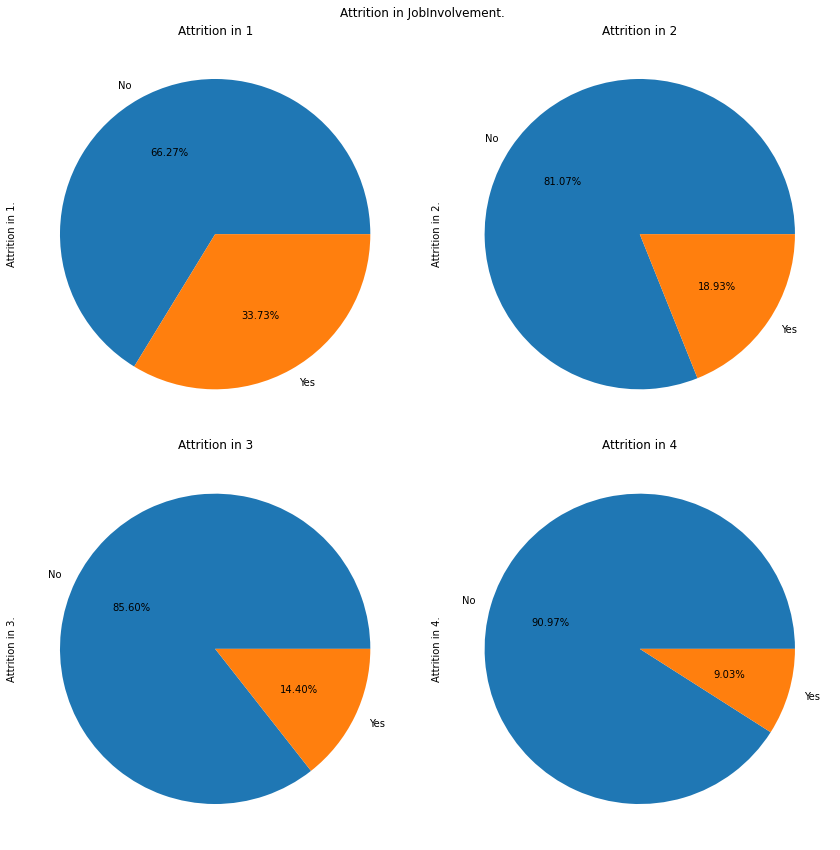

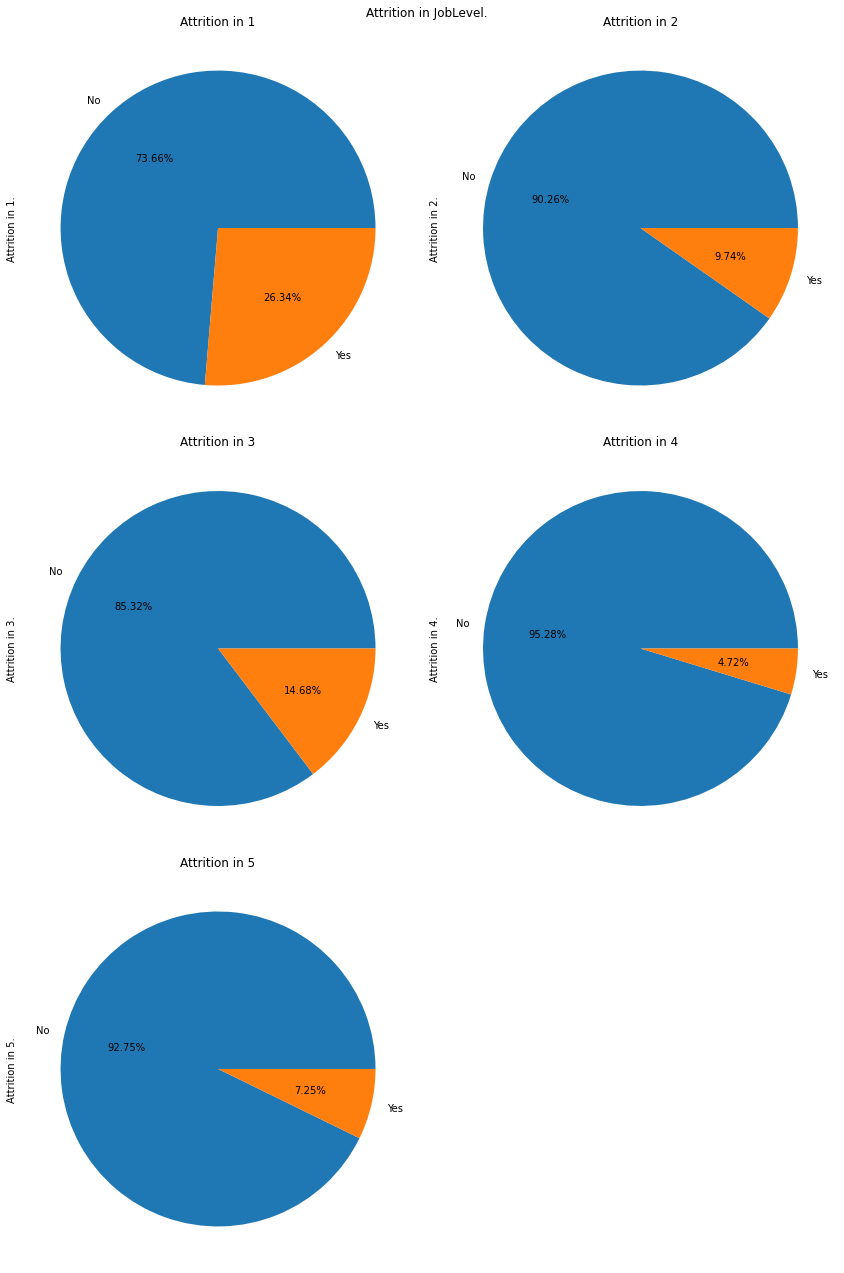

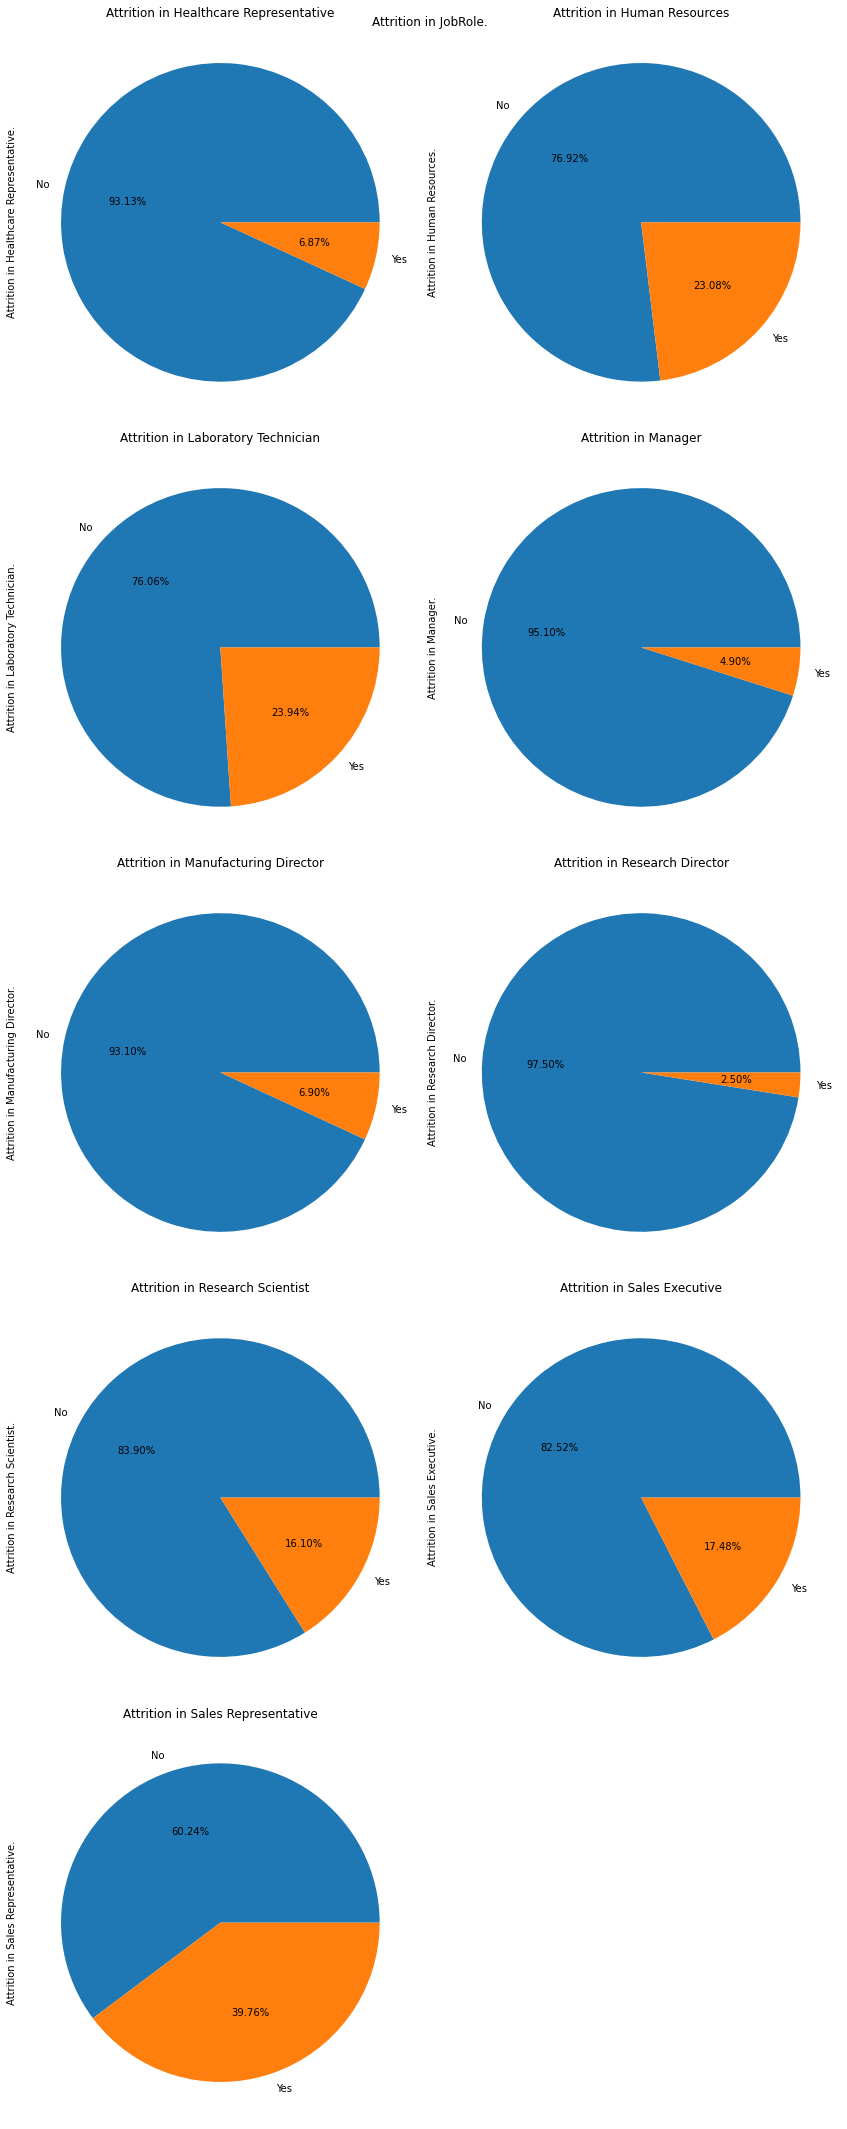

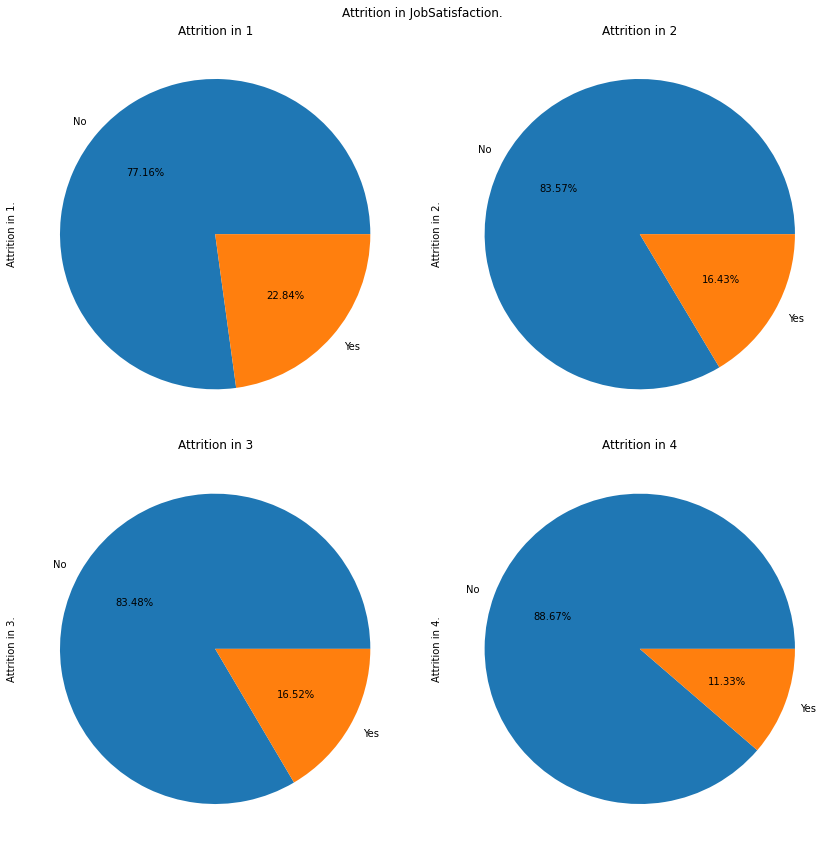

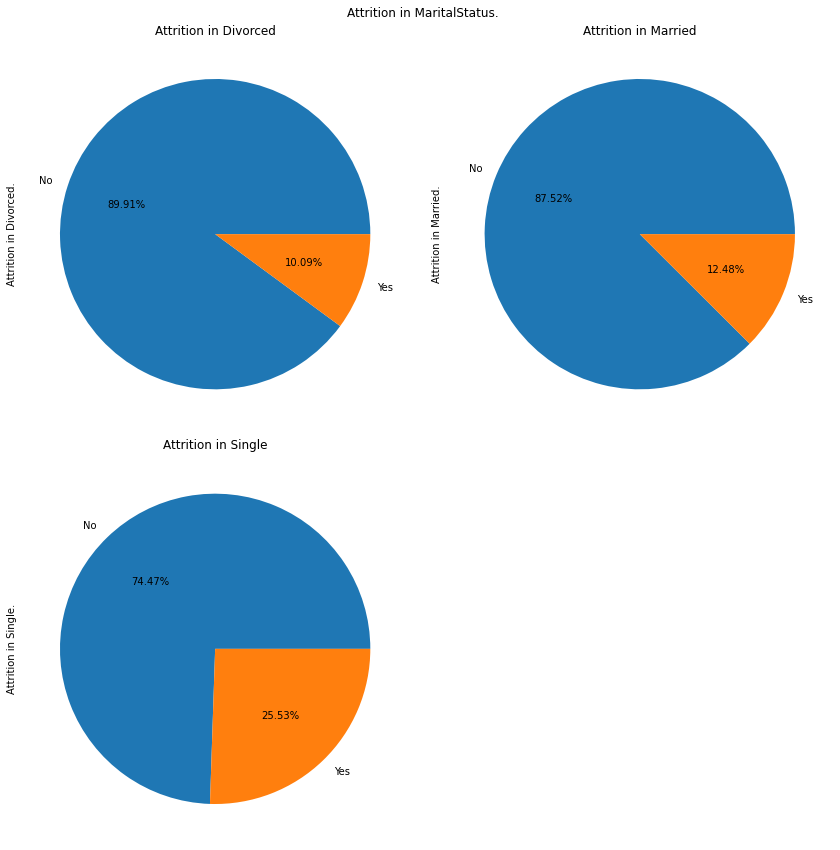

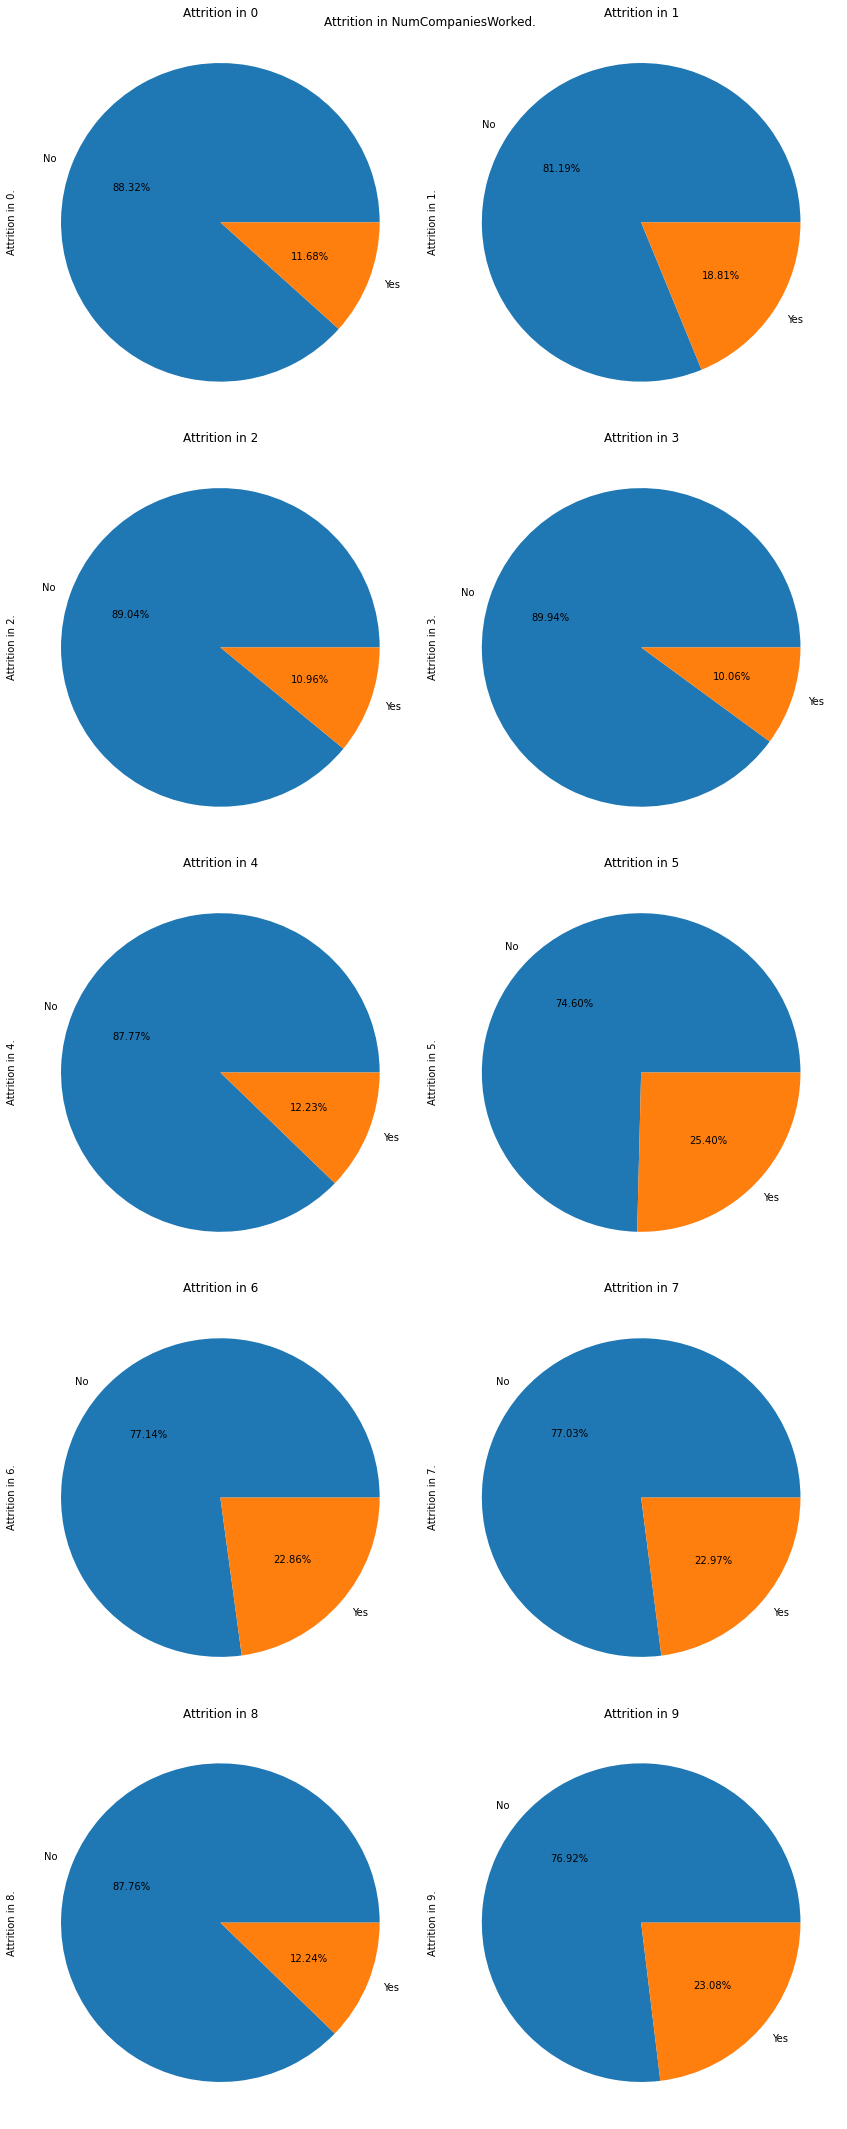

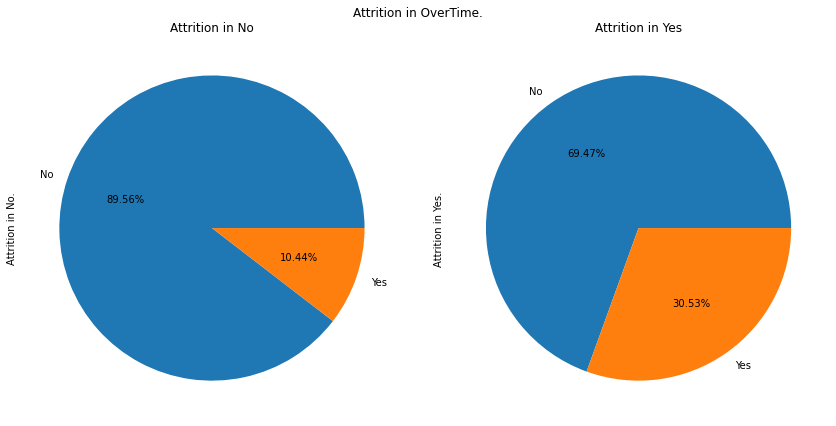

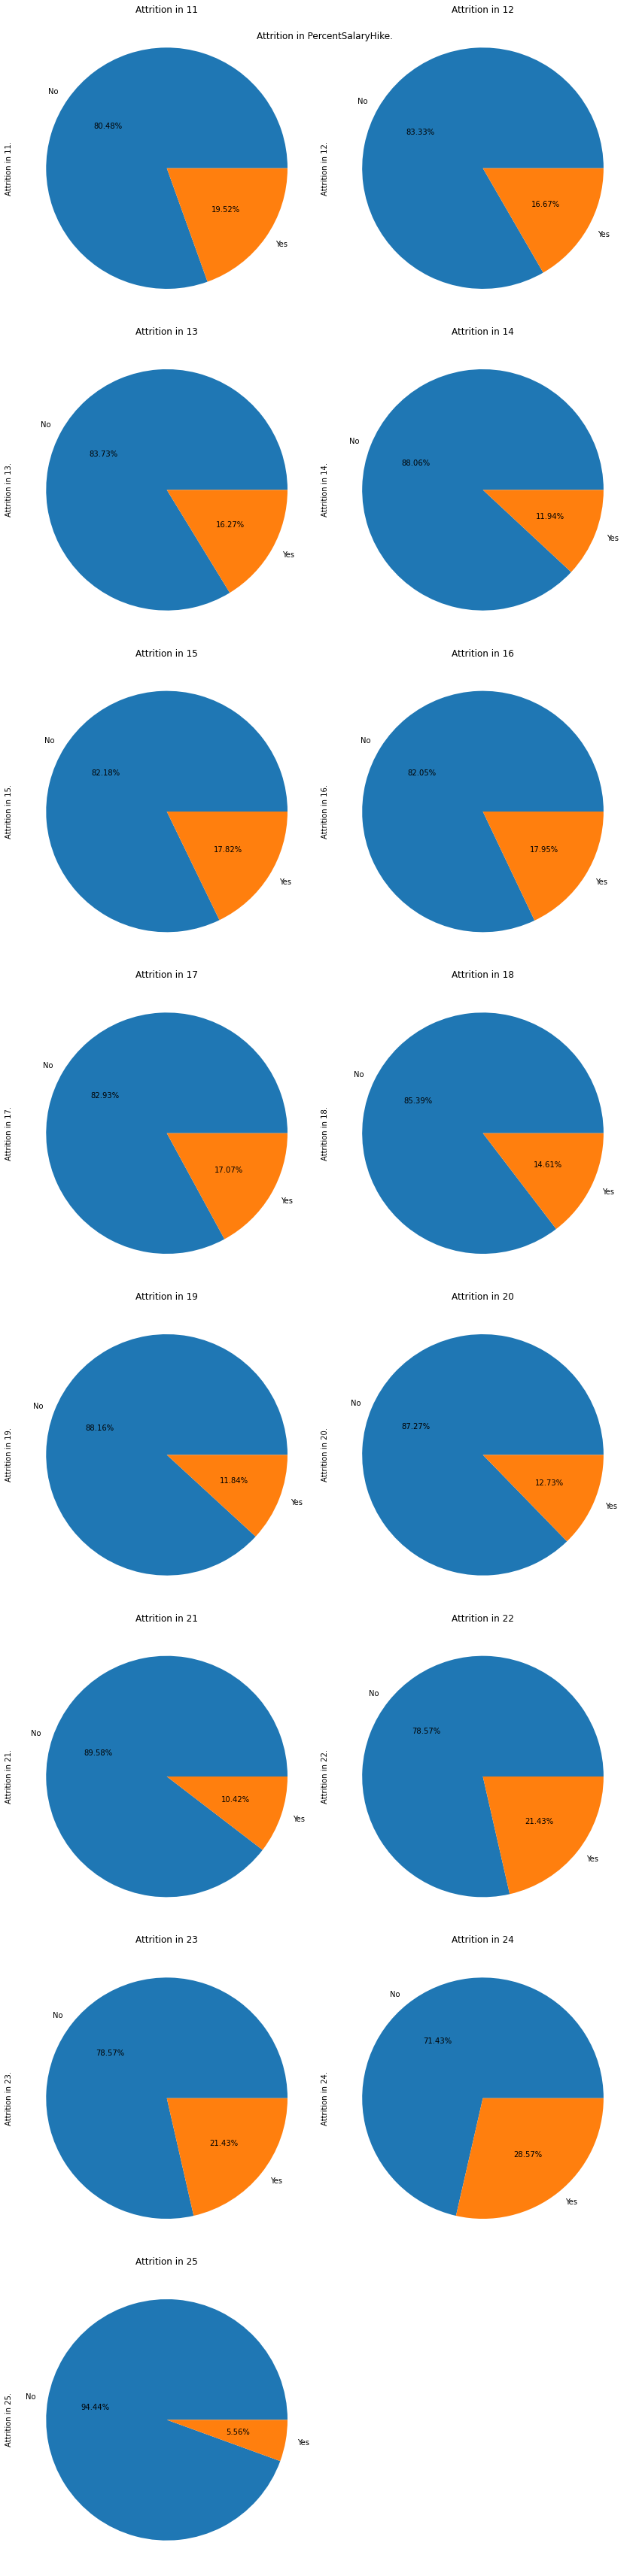

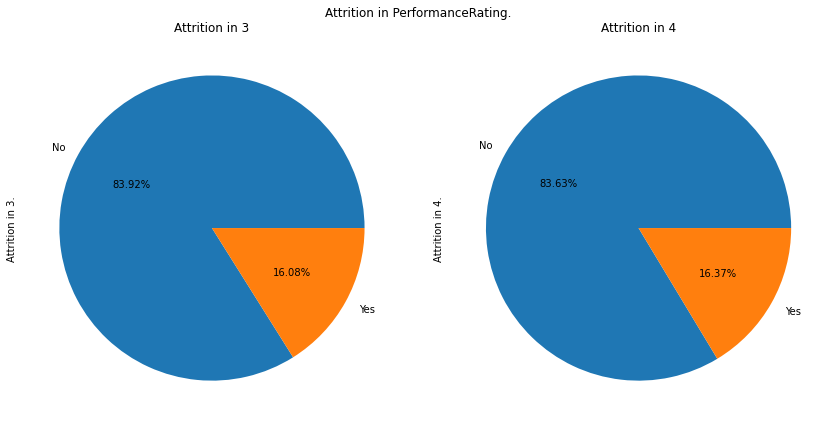

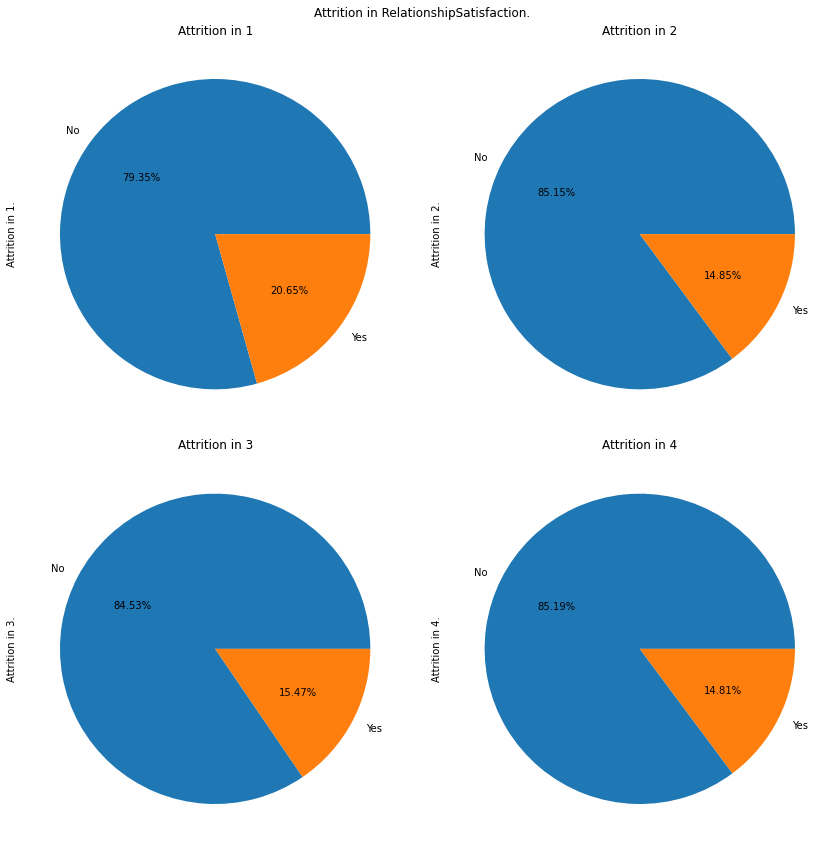

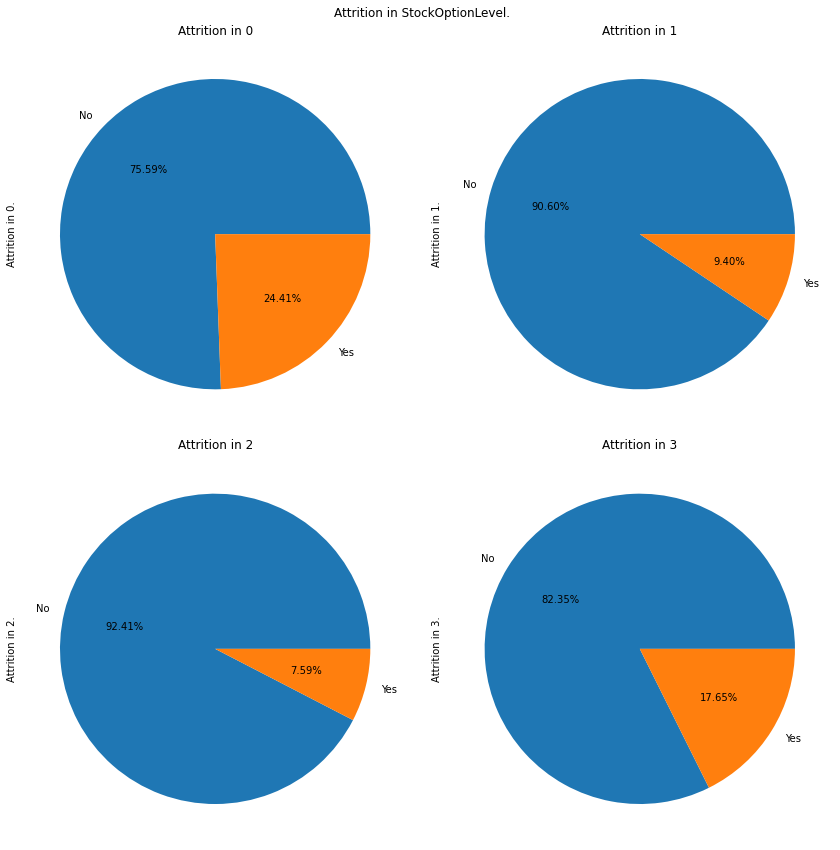

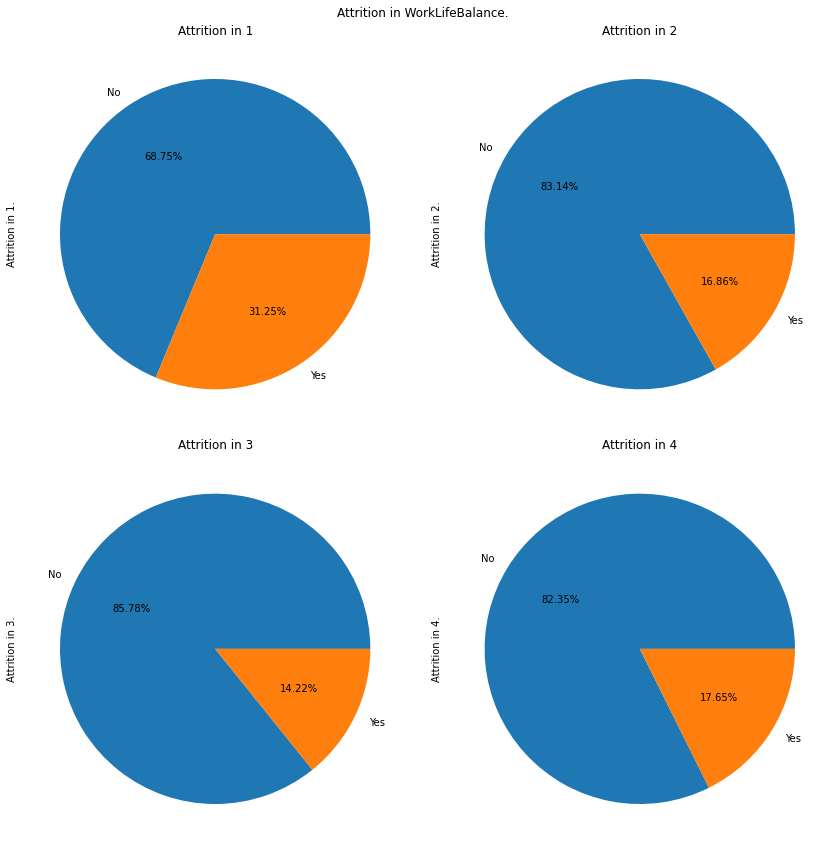

In [23]:
var_pieplot = ['BusinessTravel', 'Department', 'EducationField', 'EnvironmentSatisfaction','Gender','JobInvolvement',
               'JobLevel', 'JobRole','JobSatisfaction','MaritalStatus', 'NumCompaniesWorked', 'OverTime',
               'PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

var_pieplotNOT = ['DistanceFromHome','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
                  'YearsSinceLastPromotion', 'YearsWithCurrManager']

for var in var_pieplot:
    temp_unique = sorted(data4cap[var].unique())
    row_s = ceil(len(temp_unique)/2)
    column_s = 2
    temp_data = data4cap.groupby([var, 'Attrition']).Age.count().reset_index()
    plt.figure(figsize = (12, row_s*6))
    #print(temp_unique, row_s, column_s)
    #print(temp_data)
    ind_ex = 1
    for val_uni in temp_unique:
        temp_df = temp_data[temp_data[var] == val_uni]
        plt.suptitle(f'Attrition in {var}.')
        plt.subplot(row_s, 2, ind_ex)
        ind_ex += 1
        temp_df.Age.plot.pie(labels = temp_df.Attrition, autopct = '%.2f%%')
        plt.ylabel(f'Attrition in {val_uni}.')
        plt.title(f'Attrition in {val_uni}')
    plt.tight_layout()

plt.show()


#### Observations

1. In Business Travel category - Attrition is highest among people who Travel Frequently - at 24.91%
2. In Department category - Attrition is highest in Sales (20.63%) closely followed by Human Resources (19.05%). R&D shows low attrition at 13.84%
3. In Education Field - Attrition is high in Marketing(22.01%), Human Resources(25.93%), Technical Degree(24.24%). Medical degree, Life Sciences and Other - show lower Attrition.
4. In Environment Satisfaction - those who are least satisfied with rating of 1 show the highest attrition at 25.35%
5. Attrition by Gender does not show significant difference between the rates - Male Attrition is at 17.01% while Female Attrition is at 14.80%
6. JobInvolvement shows a clear inverse correlation with Attrition - lowest rated Job Involvment (1) shows the highest attrition at 33.73% while highest Job Involvment (4) shows the least Attrition at 9.03%.
7. Job Level 1 shows the highest Attrition at 26.34% and Job Level 4 shows the least Attrition at 4.72%.
8. In Job Role - Sales Reps show the highest Attrition at 39.76% followed by Lab Technician at 23.94% and Human Resources at 23.08%.
9. Attrition in Job Satisfaction - Least Job Satisfaction at 1 shows highest Attrition at 22.84% and highest Job Satisfaction at 4 shows the least Attrition at 11.33%.
10. Single people show the most Attrition at 25.53% (which may not neccessarily be a reflection of marital status to Attrition but Age to Attrition. Younger people tend to be single and as we have seen previously younger people tend to have more Attrition. If required, the relationship between Marital Status and Attrition can be explored vis a vis age. 
11. People who have already worked in 5 or more companies tend to have more attrition.
12. There is a stark difference in Attrition between employees who worked overtime(30.53%) versus those who dont work overtime(10.44%).
13. Attrition in different Salary Hike Percentages doesnt show significant variance EXCEPT in the range of 22 - 24% Salary Hike increases. Were these employees expecting more? Were they miscategorised and should have been paid in the same range as the ones who received 25% Salary Hike(which is the highest salary hike AND the lowest attrition at 5.56%.
14. No significant difference in Attrition in the group Performance Rating. 
15. Least rating in Relationship Satisfaction (1) has the highest attrition - at 20.65%
16. Employees who have no stock options (Stock Option level 0) have the highest attrition at 24.41%
17. Lowest rating in Work Life Balance (1) has highest attrition at 31.25%


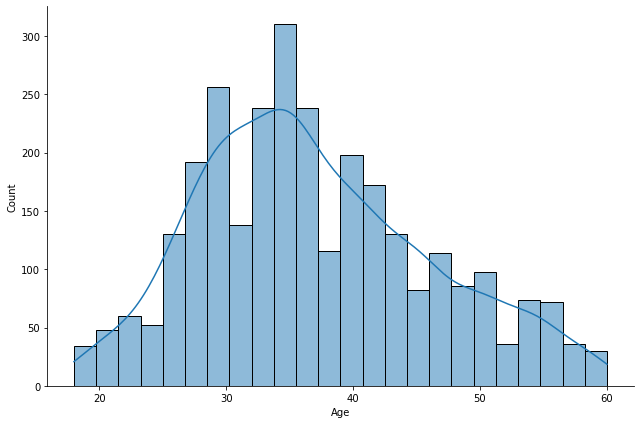

In [24]:
# Plot Age Distribution

data4cap['Attrition'] = data4cap['Attrition'].astype("category")
displot_age = sns.displot(data4cap.Age,kde=True, height=6, aspect= 1.5)

plt.show()

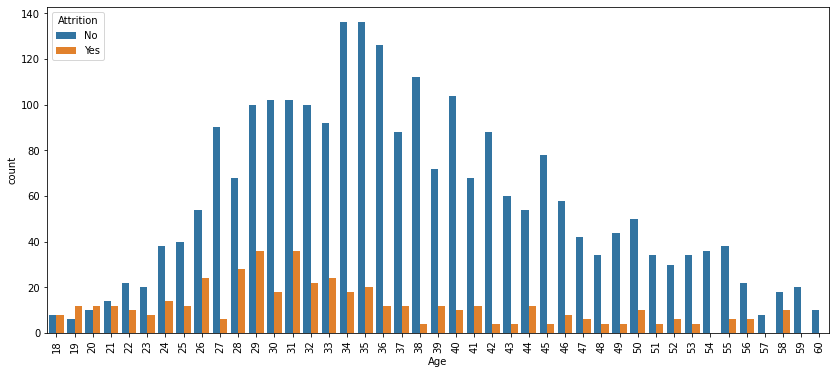

In [25]:
# Plot Attrition by Age
plt.figure(figsize = (14, 6))
sns.countplot(data = data4cap, x = 'Age', hue='Attrition')
plt.xticks(rotation = 90)
plt.show()


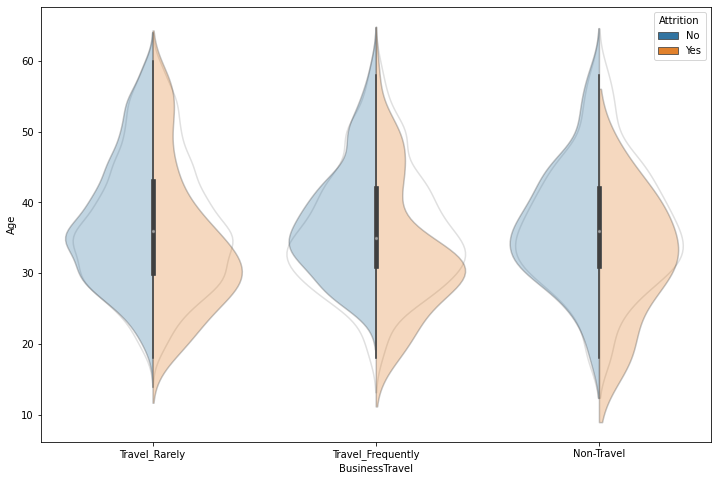

In [26]:
#Plotting Attrition for Age and Business Travel

plt.figure(figsize = (12,8))
sns.violinplot(data = data4cap, x = 'BusinessTravel', y = 'Age', color = 'White')
ax = sns.violinplot(data = data4cap, x = 'BusinessTravel', y = 'Age', hue = 'Attrition', split=True, alpha = 0.9)
plt.setp(ax.collections, alpha = 0.3)
plt.show()



#### Observation

1. The distribution plots for all three categories - Travel Rarely, Travel Frequently and Non Travel - dont seem to be significantly different either as a whole (Total Distribution of ages over all three categories) or when split by Attrition.  

<Figure size 432x288 with 0 Axes>

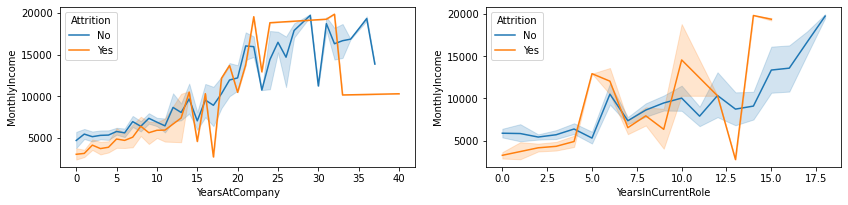

In [27]:
# Plot income vs Years at Company and Years in Current Role to view relation.

plt.tight_layout()
plt.figure(figsize = (14,10))

plt.subplot(3,2,1)
ax1 = sns.lineplot(data = data4cap, x = 'YearsAtCompany', y='MonthlyIncome', hue = 'Attrition')
plt.subplot(3,2,2)
ax2 = sns.lineplot(data = data4cap, x = 'YearsInCurrentRole', y = 'MonthlyIncome', hue = 'Attrition')

plt.show()


##### Observations

Income though co-related to Years at Company, does show a very erratic pattern after 20 years at the company. 

Attrition in this co-related plot does not show a distinct pattern. 

Note - causes of these observations are not clearly apparent.

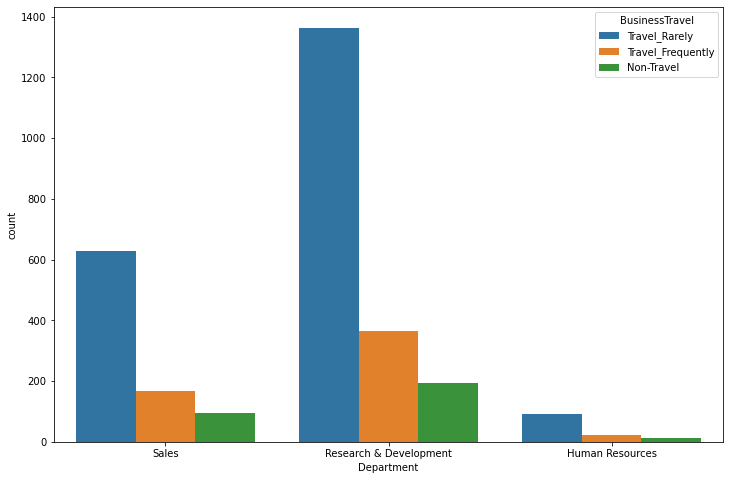

In [28]:
#plotting Department against Business Travel

plt.figure(figsize = (12,8))
sns.countplot(data = data4cap, x = 'Department', hue = 'BusinessTravel')

plt.show()

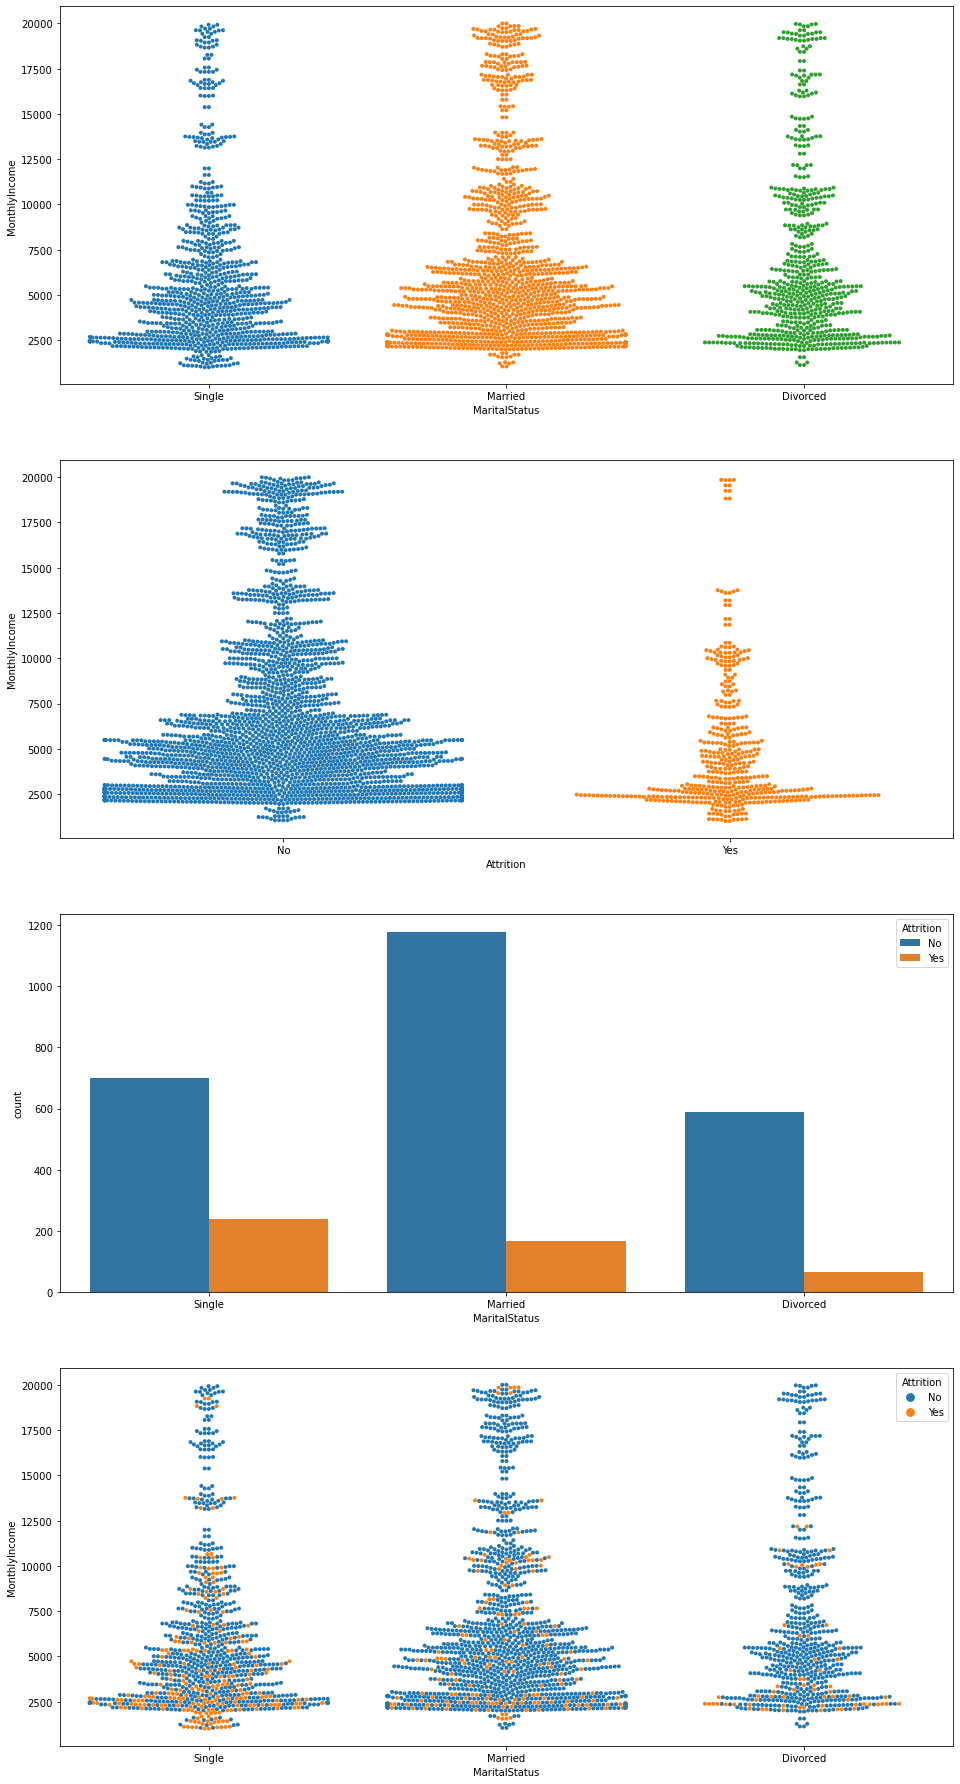

In [29]:
#Plot relation between Monthly Income, Marital Status and Attrition

plt.figure(figsize = (16,32))
plt.subplot(4,1,1)
sns.swarmplot(data = data4cap, y = 'MonthlyIncome', x = 'MaritalStatus', size = 4)
plt.subplot(4,1,2)
sns.swarmplot(data = data4cap, y = 'MonthlyIncome', x = 'Attrition', size = 4)
plt.subplot(4,1,3)
sns.countplot(data = data4cap, x = 'MaritalStatus', hue = 'Attrition')
plt.subplot(4,1,4)
sns.swarmplot(data = data4cap, y = 'MonthlyIncome', x = 'MaritalStatus', hue = 'Attrition', size = 4)

plt.show()


### Observations

1. Income distribution between Single, Married and Divorced groups shows no significant difference. 
2. Lower income groups have higher density of employees, which is normal. Rate of attrition amongst the lowest income groups - 2,500 to 5000 show higher Attrition even when accounting for higher density in the lower income groups. 
3. Singles have a higher proportion of attrition than other groups when taking Monthly Income into account. This is also normal behaviour as Singles tend to be younger and are probably at the beginning of their careers and fall into lower income groups. 
4. Between the 10,000 to 12,500 income age group - Married group tends to show a little bit more concentrated attrition. This may be worth exploring further as increased family responsibilities MAY play a role in a quest for higher remuneration around that threshold.

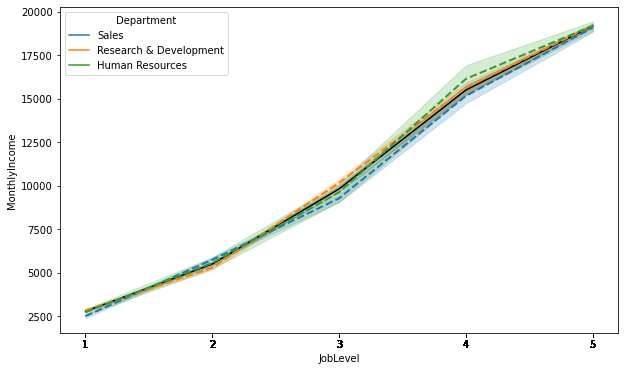

In [30]:
# Plot Job Level vs Monthly Income

plt.figure(figsize = (10,6))
sns.lineplot(data = data4cap, x = 'JobLevel', y = 'MonthlyIncome', color ='black')
sns.lineplot(data = data4cap, x = 'JobLevel', y = 'MonthlyIncome', hue = 'Department', linestyle = '--', linewidth = 2)
plt.xticks(data4cap['JobLevel'])
plt.show()

### Observations

1. Monthly Income rises as per Job Level
2. It is consistent across all departments.

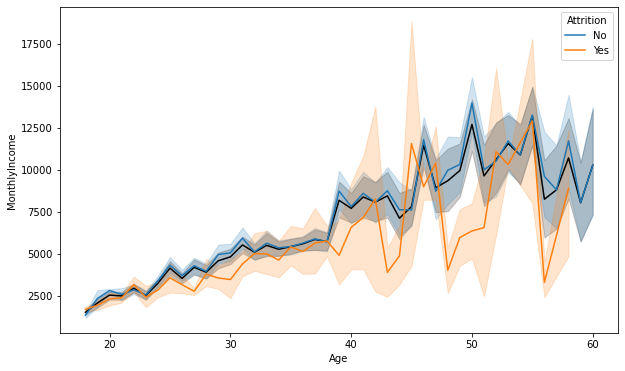

In [31]:
# Plotting Age vs Monthly Income

plt.figure(figsize = (10, 6))

sns.lineplot(data = data4cap, x = 'Age', y = 'MonthlyIncome', color = 'black')
sns.lineplot(data = data4cap, x = 'Age', y = 'MonthlyIncome', hue = 'Attrition')
plt.show()

#### Observations

1. Monthly Income tracks Age, as expected, and is consistent with YearsAtCompany and YearsInCurrentRole seen in graphs above. 
2. Attrition takes an erratic direction starting around age 39 - with sudden peaks and valleys. 

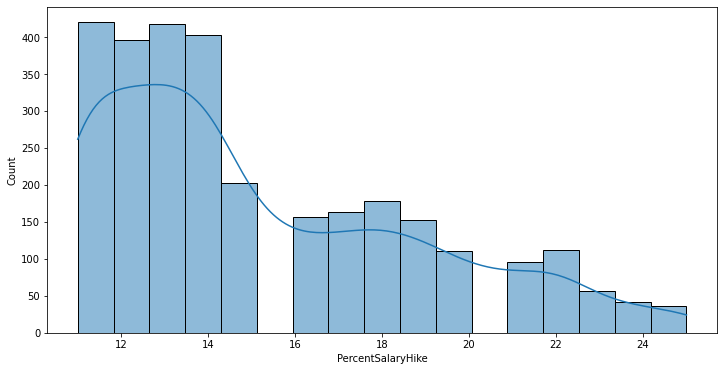

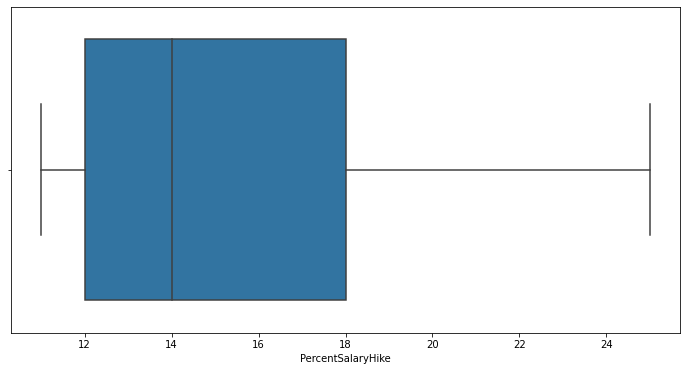

count    2940.000000
mean       15.209524
std         3.659315
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

In [32]:
# Plotting Histogram for Percent Salary Hike

plt.figure(figsize = (12,6))
sns.histplot(data = data4cap, x = 'PercentSalaryHike', kde = True)
plt.show()

# Plotting BoxPlot for Percent Salary Hike

plt.figure(figsize = (12,6))
sns.boxplot(data = data4cap, x = 'PercentSalaryHike')
plt.show()

data4cap.PercentSalaryHike.describe()


#### Observations

1. The Percent Salary Histogram is skewed right i.e. most of the PercentSalaryHike lies between 11 to 15%. Some like between 16 to 20% and fewer points lie between 21 to 25%.
2. The minimum % Salary Hike is 11%, maximum is 25%, mean is at 15.21% and median is at 14%. 



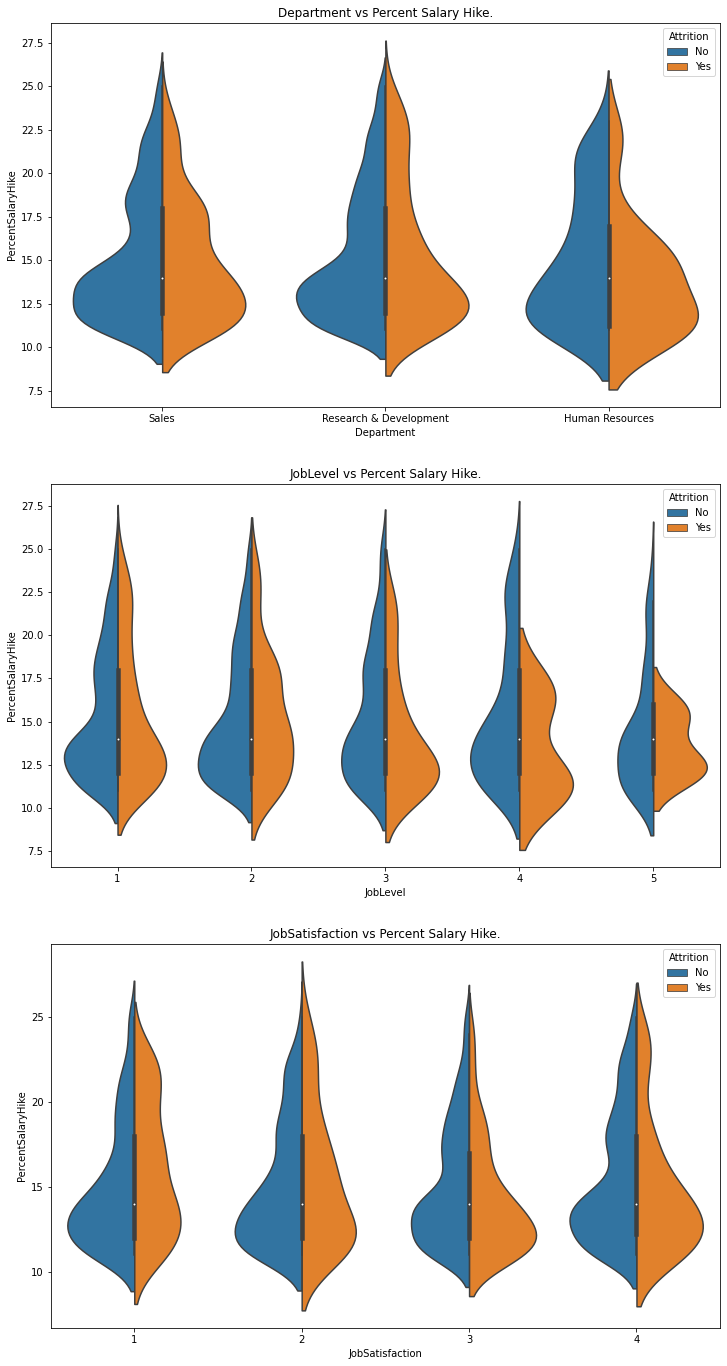

In [33]:
# Plot Percent Salary Hike vs Department, Job Level and Job Satisfaction Level

pct_sal_hike_comp = ['Department', 'JobLevel', 'JobSatisfaction']

plt.figure(figsize = (12,24))

ind_ex_pct_sal = 1

for var_pct_sal in pct_sal_hike_comp:
    plt.subplot(3,1,ind_ex_pct_sal)
    sns.violinplot(data = data4cap, x = var_pct_sal, y = 'PercentSalaryHike', hue = 'Attrition', split = True)
    ind_ex_pct_sal += 1
    plt.title(f'{var_pct_sal} vs Percent Salary Hike.')

plt.show()

#### Observations

1. Percent Salary Hike does not seem to have a significant difference in distributions across Department, JobLevel and Job Satisfaction. Though, we already saw in previous graphs that attrition in the range 21-24% is higher than other ranges. 

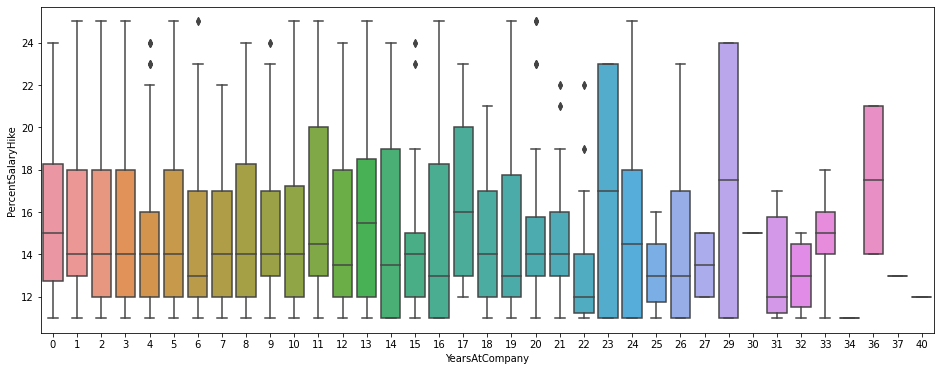

In [34]:
# Plot % Salary Hike for Number of Years worked

plt.figure(figsize = (16,6))
sns.boxplot(data = data4cap, y = 'PercentSalaryHike', x = 'YearsAtCompany')
plt.show()

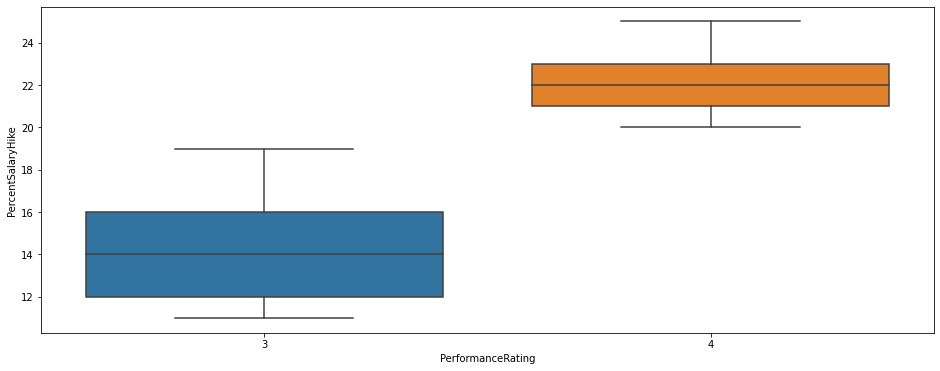

In [35]:
# Plot Performance Rating and % Salary Hike

plt.figure(figsize = (16,6))
sns.boxplot(data = data4cap, x = 'PerformanceRating', y = 'PercentSalaryHike')
plt.show()

#### Observations

1. Different Years at Company still have a range of 11 to 25% across all the years with little differences every year. 
2. Performance rating of 3 resulted in % Salary Hike of 11 to 20%. Performance Rating of 4 resulted in a % Salary Hike of 21% to 25%. 

## Data Preprocessing

In [36]:
# Importing the required Libraries


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, roc_curve, auc, confusion_matrix

In [37]:
# Convert Categorical variables thru Label Encoding

list_to_encode = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus',
                  'OverTime']


def labelencoder(df, a_list):
    temp_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    for a in a_list:
        temp_df[a] = le.fit_transform(temp_df[a])
    return temp_df

encoded_data4cap = labelencoder(data4cap, list_to_encode)   
    

In [38]:
# Splitting x and y values

x = encoded_data4cap.drop(['Attrition'], axis = 1)
y = encoded_data4cap['Attrition'].values

In [39]:
# Splitting x and y, Train and Test values

X_Train, X_Test, Y_Train, Y_Test = train_test_split(x,y, test_size = 0.2)

In [40]:
X_Train.shape

(2352, 30)

In [41]:
Y_Train.shape

(2352,)

In [42]:
X_Test.shape

(588, 30)

In [43]:
Y_Test.shape

(588,)

In [44]:
# Build the Random Forest Decision Tree Model

model_Attr_RF = RandomForestClassifier(n_estimators = 100, random_state = 42)
model_Attr_RF.fit(X_Train, Y_Train)
model_Attr_RF_score_train = model_Attr_RF.score(X_Train, Y_Train)
model_Attr_RF_score_test = model_Attr_RF.score(X_Test, Y_Test)
print(f'Training Score for model_Attr_RF is {model_Attr_RF_score_train}.')
print(f'Testing Score for model_Attr_RF is {model_Attr_RF_score_test}.')

Training Score for model_Attr_RF is 1.0.
Testing Score for model_Attr_RF is 0.9659863945578231.


In [45]:
# Calculating the Probabilities for the AUC for Model

y_pred_prob = model_Attr_RF.predict_proba(X_Test)[:,1]
y_pred_prob

array([0.1 , 0.18, 0.71, 0.  , 0.84, 0.12, 0.02, 0.22, 0.76, 0.04, 0.02,
       0.01, 0.27, 0.05, 0.67, 0.  , 0.07, 0.02, 0.04, 0.75, 0.03, 0.11,
       0.02, 0.67, 0.06, 0.09, 0.05, 0.02, 0.14, 0.05, 0.05, 0.48, 0.13,
       0.06, 0.08, 0.03, 0.73, 0.01, 0.03, 0.17, 0.14, 0.02, 0.12, 0.05,
       0.1 , 0.78, 0.07, 0.22, 0.03, 0.77, 0.06, 0.16, 0.98, 0.01, 0.04,
       0.03, 0.05, 0.12, 0.04, 0.07, 0.14, 0.08, 0.15, 0.04, 0.  , 0.03,
       0.02, 0.01, 0.2 , 0.07, 0.61, 0.02, 0.09, 0.  , 0.13, 0.8 , 0.09,
       0.27, 0.02, 0.37, 0.07, 0.58, 0.12, 0.11, 0.7 , 0.77, 0.02, 0.72,
       0.01, 0.15, 0.05, 0.01, 0.01, 0.09, 0.72, 0.06, 0.04, 0.11, 0.11,
       0.01, 0.01, 0.37, 0.04, 0.09, 0.01, 0.74, 0.03, 0.03, 0.07, 0.03,
       0.16, 0.3 , 0.01, 0.04, 0.02, 0.05, 0.65, 0.79, 0.14, 0.07, 0.08,
       0.08, 0.18, 0.  , 0.51, 0.01, 0.03, 0.03, 0.03, 0.  , 0.01, 0.06,
       0.05, 0.05, 0.05, 0.04, 0.03, 0.68, 0.78, 0.05, 0.02, 0.87, 0.08,
       0.04, 0.11, 0.08, 0.17, 0.7 , 0.07, 0.02, 0.

In [46]:
# Predicting Attrition for X_Test

y_pred = model_Attr_RF.predict(X_Test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [47]:
# Model Accuracy and Recall

print(f'Model Accuracy is {(model_Attr_RF.score(X_Test, Y_Test))*100}%.')
print(f'Model Recall is {(recall_score(Y_Test, y_pred))*100}%.')

Model Accuracy is 96.5986394557823%.
Model Recall is 79.38144329896907%.


In [48]:
# Area Under Curve

fpr_d4c, tpr_d4c, _ = roc_curve(Y_Test, y_pred_prob)
roc_auc_d4c = auc(fpr_d4c, tpr_d4c)

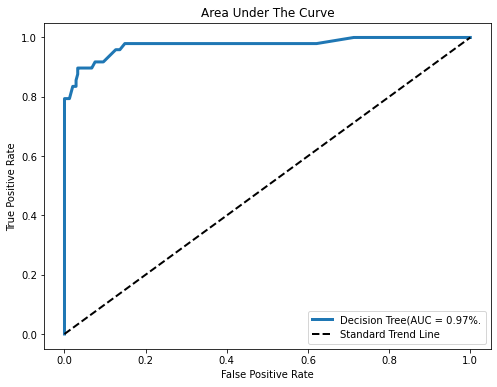

In [49]:
# Plotting the AUC

plt.figure(figsize = (8,6))
plt.plot(fpr_d4c, tpr_d4c, label = f'Decision Tree(AUC = %0.2f%%.' % roc_auc_d4c, linewidth = 3, linestyle = '-')
plt.plot([0,1], [0,1], color = 'black', linestyle = '--', linewidth = 2, label = 'Standard Trend Line')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under The Curve')
plt.legend()
plt.show()

In [50]:
# Print Confusion Matrix

conf_mat_Attr_RF = confusion_matrix(Y_Test, y_pred)
print(conf_mat_Attr_RF)

[[491   0]
 [ 20  77]]


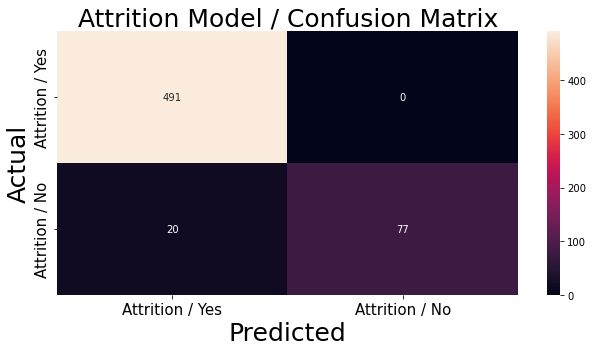

In [51]:
# Plot Confusion Matrix

plt.figure(figsize = (9,5))
colormap = sns.color_palette('Blues', 12)
sns.heatmap(conf_mat_Attr_RF, annot = True, fmt = 'g')
posx, text_valx = plt.xticks()
posy, text_valy = plt.yticks()




plt.xticks(posx, ['Attrition / Yes', 'Attrition / No'], fontsize = 15)
plt.yticks(posy, ['Attrition / Yes', 'Attrition / No'], fontsize = 15, va ='center')
plt.xlabel('Predicted', fontsize = 25)
plt.ylabel('Actual', fontsize = 25)
plt.title('Attrition Model / Confusion Matrix', fontsize = 25)

plt.tight_layout()
plt.show()


Feature Ranking of Attrition Random Forest Model : 
1. Feature MonthlyIncome contributed 7.89% to the result. Cumulative Contribution so far is 7.89%
2. Feature DailyRate contributed 6.09% to the result. Cumulative Contribution so far is 13.99%
3. Feature Age contributed 6.03% to the result. Cumulative Contribution so far is 20.02%
4. Feature OverTime contributed 5.74% to the result. Cumulative Contribution so far is 25.75%
5. Feature TotalWorkingYears contributed 5.23% to the result. Cumulative Contribution so far is 30.98%
6. Feature MonthlyRate contributed 5.11% to the result. Cumulative Contribution so far is 36.10%
7. Feature HourlyRate contributed 5.05% to the result. Cumulative Contribution so far is 41.14%
8. Feature DistanceFromHome contributed 4.87% to the result. Cumulative Contribution so far is 46.01%
9. Feature YearsAtCompany contributed 4.12% to the result. Cumulative Contribution so far is 50.13%
10. Feature NumCompaniesWorked contributed 3.59% to the result. Cumulative

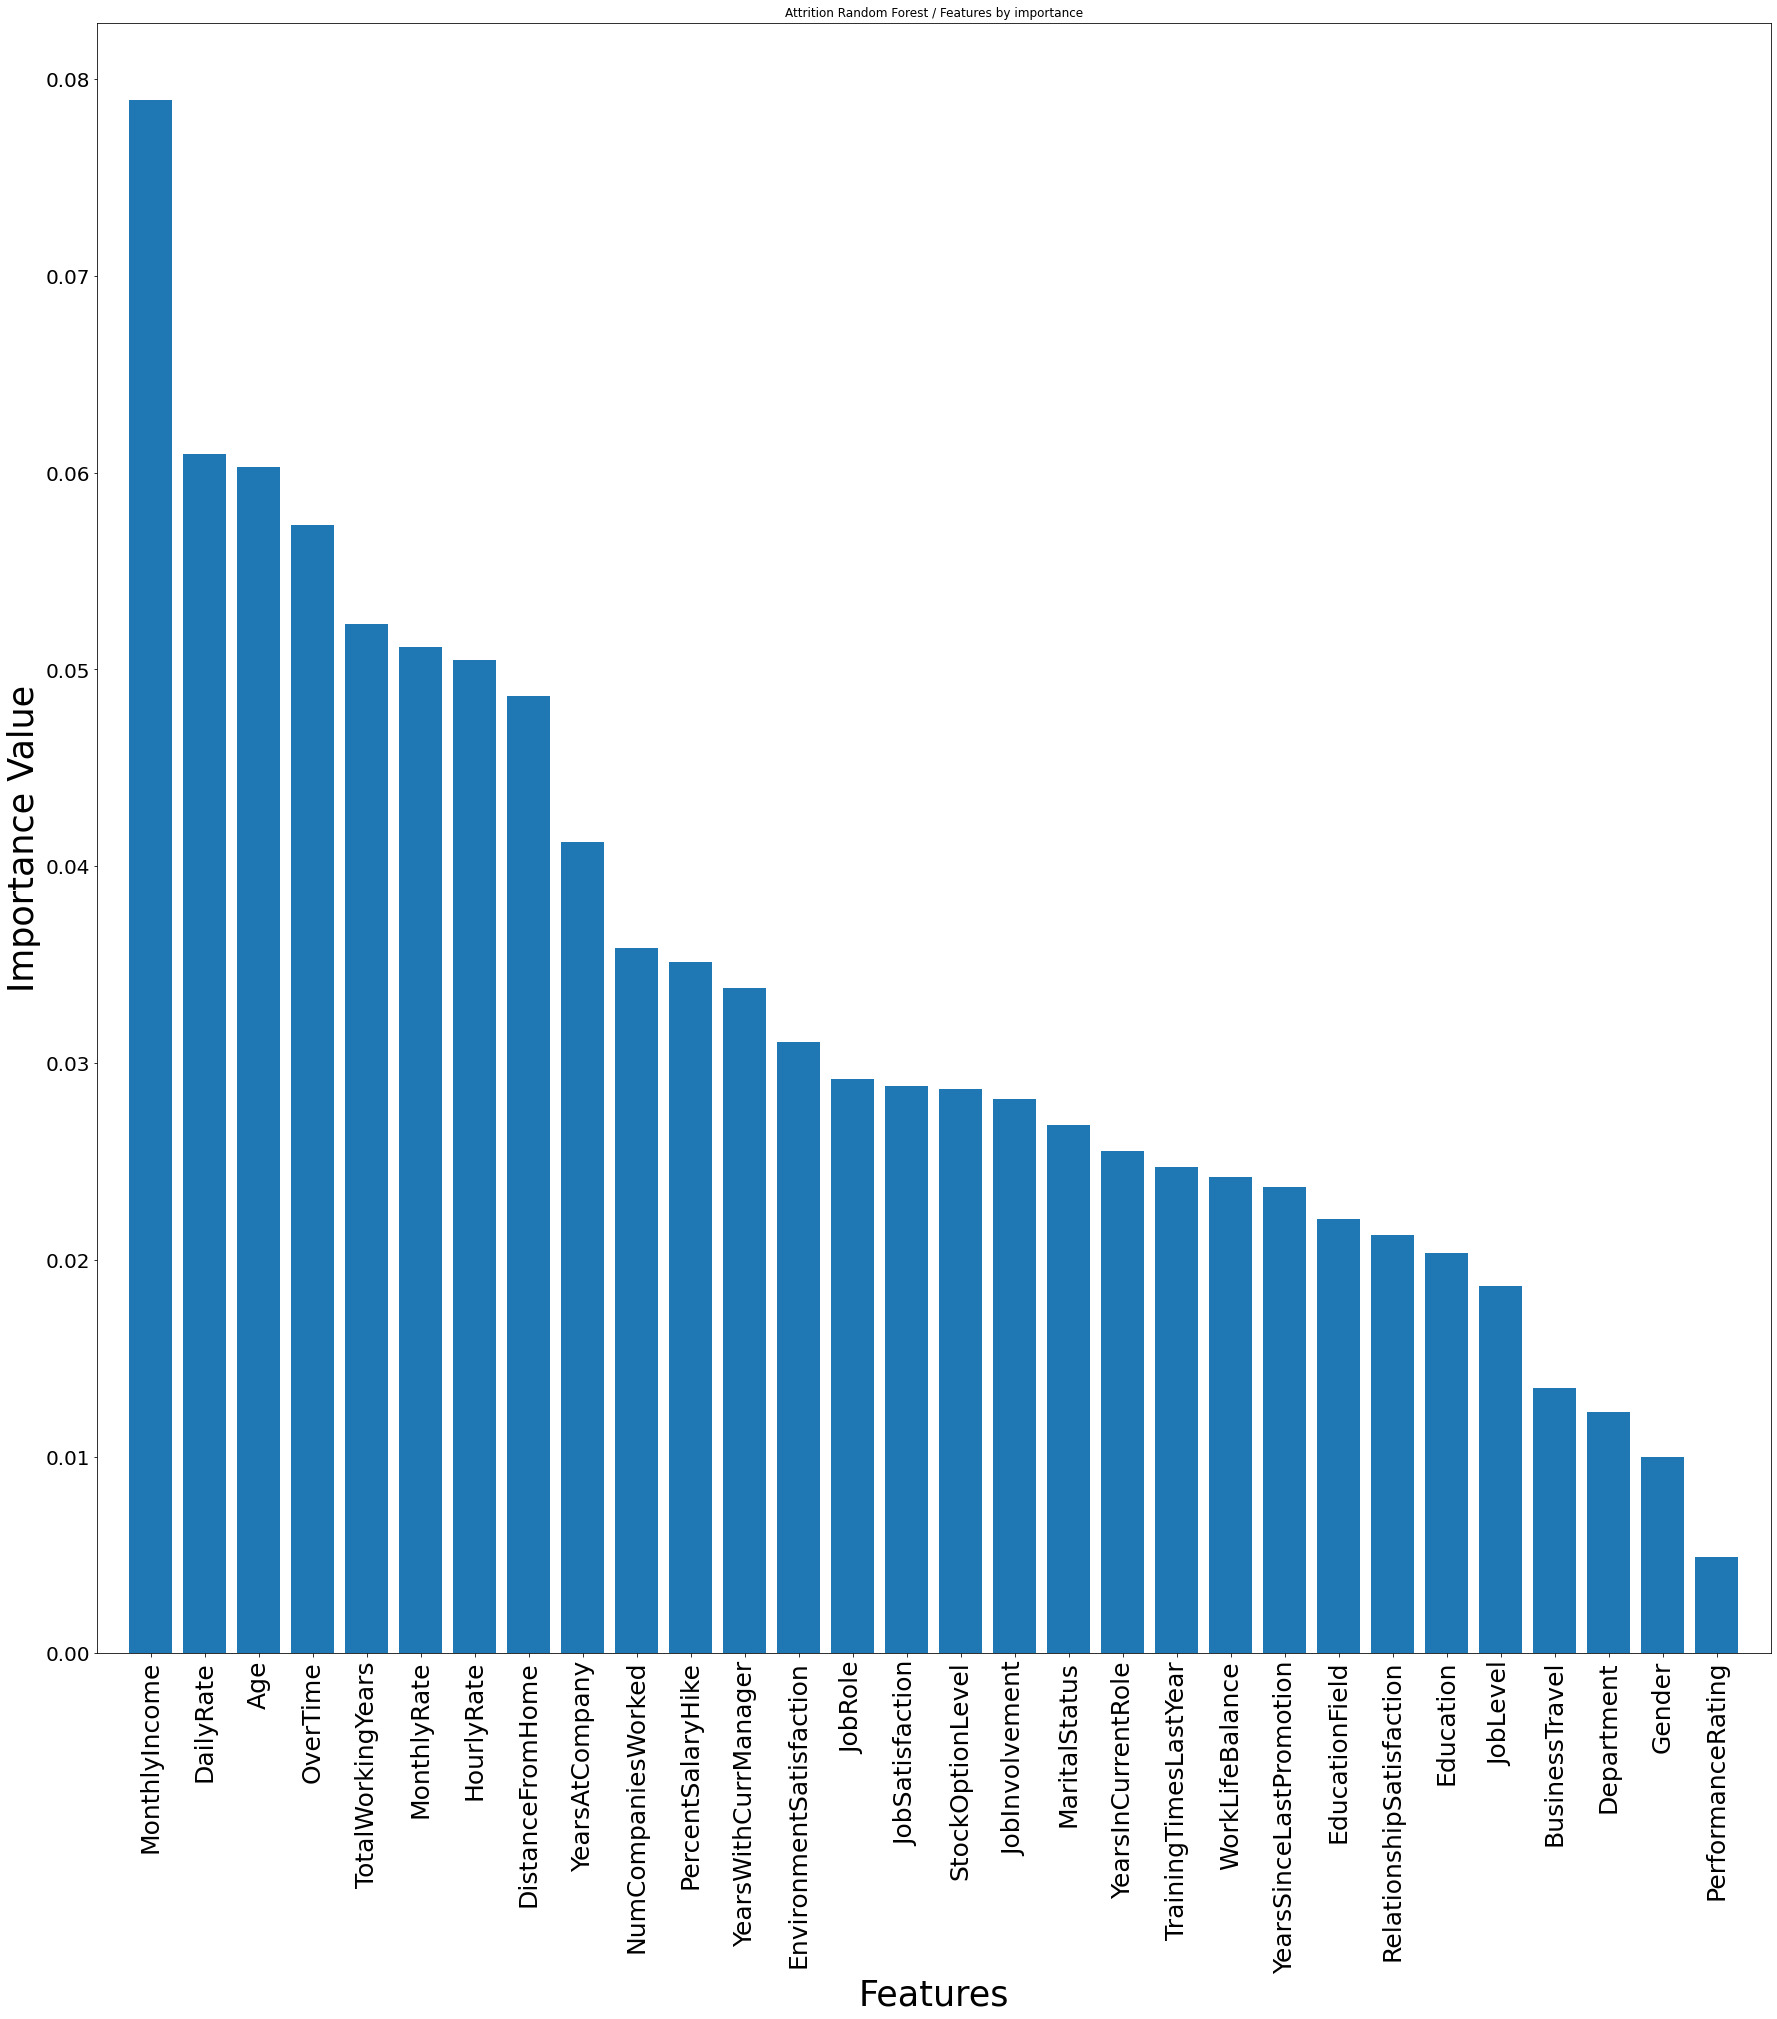

In [52]:
feature_imp = model_Attr_RF.feature_importances_
indices = np.argsort(feature_imp)[::-1]
columns_ordrd = [x.columns[a] for a in indices]

print('Feature Ranking of Attrition Random Forest Model : ')

cum_pct = 0
for f in range(len(indices)):
    cum_pct += (feature_imp[indices[f]]*100)
    print(f'{f+1}. Feature {columns_ordrd[f]} contributed {(feature_imp[indices[f]]*100):.2f}% to the result. Cumulative Contribution so far is {cum_pct:.2f}%')

plt.figure(figsize = (30,30))

plt.bar(columns_ordrd, feature_imp[indices])
plt.xticks(rotation = 90, fontsize = 25)
plt.yticks(fontsize = 20)
plt.xlim([-1,len(indices)])
plt.xlabel('Features', fontsize = 35)
plt.ylabel('Importance Value', fontsize = 35)
plt.title('Attrition Random Forest / Features by importance')

plt.show()